In [2]:
import pandas as pd
import numpy as np

import requests as re
import json
import geopandas as gpd
from shapely import geometry
from matplotlib import pyplot as plt

## load packages
import networkx as nx
import numpy as np #数值计算包
import scipy as sp #科学计算包
import matplotlib.pyplot as plt #绘图包

#   0 construction networkx

In [5]:
# 公交线路
df1=pd.read_csv('数据处理\公交线路.csv',encoding='gbk')
df1=df1.drop(columns='Unnamed: 0')
def split_x11(x):
    x=x.replace('[','').replace(']','').replace(" ",'').replace("'",'').split(',')
    x=[c+'_b' for c in x]
    return x
df1['stations']=df1['stations'].apply(lambda x:split_x11(x))
df1.head()

line                                           stations  \
0   43  [五间楼_b, 贾家花园_b, 赵公口桥南_b, 刘家窑桥西_b, 刘家窑桥北_b, 蒲黄榆...   
1  458  [北京南站_b, 永定门长途汽车站_b, 陶然亭公园南门_b, 开阳桥西_b, 右安门东_b...   
2  696  [国展新馆公交场站_b, 国展新馆_b, 顺义马连店_b, 北甸_b, 地铁孙河站_b, 孙...   
3  563  [香山公园东门_b, 香山_b, 卧佛寺_b, 北京植物园南门_b, 香泉环岛_b, 正蓝旗...   
4   39  [北京站东_b, 建国门南_b, 东便门_b, 崇文门东_b, 花市路口南_b, 磁器口南_...   

                                            geometry  
0  LINESTRING (116.42366 39.85051, 116.41722 39.8...  
1  LINESTRING (116.37623 39.86653, 116.38294 39.8...  
2  LINESTRING (116.54162 40.07618, 116.5473 40.06...  
3  LINESTRING (116.20063 39.99168, 116.20491 39.9...  
4  LINESTRING (116.43144 39.90494, 116.4361 39.90...

In [6]:
# 地铁线路
df2=pd.read_csv('数据处理\地铁线路.csv',encoding='gbk')
df2=df2.drop(columns='Unnamed: 0')
def split_x12(x):
    x=x.replace('[','').replace(']','').replace(" ",'').replace("'",'').split(',')
    x=[c+'_m' for c in x]
    return x
df2['stations']=df2['stations'].apply(lambda x:split_x12(x))
df2.head()

geometry  line  \
0  LINESTRING (116.331897 39.948864, 116.33181 39...   9号线   
1  LINESTRING (116.345527 40.0063, 116.359309 40....  15号线   
2  LINESTRING (116.442359 39.947697, 116.463716 3...   机场线   
3  LINESTRING (116.377314 39.843056, 116.372097 3...   大兴线   
4  LINESTRING (116.184436 39.932436, 116.18421099...   1号线   

                                            stations  
0  [国家图书馆_m, 白石桥南_m, 白堆子_m, 军事博物馆_m, 北京西站_m, 六里桥东...  
1  [清华东路西口_m, 六道口_m, 北沙滩_m, 奥林匹克公园_m, 安立路_m, 关庄_m...  
2                   [东直门_m, 三元桥_m, T3航站楼_m, T2航站楼_m]  
3  [公益西桥_m, 新宫_m, 西红门_m, 高米店北_m, 高米店南_m, 枣园_m, 清源...  
4  [苹果园_m, 古城路_m, 八角游乐园_m, 八宝山_m, 玉泉路_m, 五棵松_m, 万...

In [7]:
# 公交站点
df3=pd.read_csv('数据处理\公交站点.csv',encoding='gbk')
df3=df3.drop(columns='Unnamed: 0')
def split_x22(x):
    return x+'_b'
df3['station']=df3['station'].apply(lambda x:split_x22(x))
df3.head()

station        lng       lat                    geometry
0   霍营北口_b  116.36554  40.08844  POINT (116.36554 40.08844)
1    新苑街_b  116.32855  39.93540   POINT (116.32855 39.9354)
2   建功北里_b  116.35368  39.88061  POINT (116.35368 39.88061)
3   万盛北里_b  116.65084  39.86986  POINT (116.65084 39.86986)
4  莲怡园北路_b  116.29767  39.88671  POINT (116.29767 39.88671)

In [8]:
# 地铁站点
df4=pd.read_csv('数据处理\地铁站点.csv',encoding='gbk')
df4=df4.drop(columns='Unnamed: 0')
def split_x32(x):
    return x+'_m'
df4['station']=df4['station'].apply(lambda x:split_x32(x))
df4.head()

station         lng        lat                      geometry
0   魏公村_m  116.329874  39.963457  POINT (116.329874 39.963457)
1   西红门_m  116.335169  39.795445  POINT (116.335169 39.795445)
2    北苑_m  116.441315  40.048872  POINT (116.441315 40.048872)
3  张自忠路_m  116.423579  39.939914  POINT (116.423579 39.939914)
4   安贞门_m  116.412371  39.983322  POINT (116.412371 39.983322)

In [9]:
# 公交与地铁换乘
def split_x(x):
    return x.replace('[','').replace(']','').replace("'",'').replace(' ','').split(',')
def split_t(x):
    t=x
    t = t.replace('[', '').replace(']', '').replace(' ', '').replace("'", '').split(',')
    t = [float(c) for c in t]
    return t
sbtobs=pd.read_csv('公交换乘地铁的步行时间.csv',encoding='gbk')  # 相依连接边
sbtobs['tostations']=sbtobs['tostations'].apply(lambda x:split_x(x))
sbtobs['to_time']=sbtobs['to_time'].apply(lambda x:split_t(x))
sbtobs=sbtobs.drop(columns=['Unnamed: 0'])
sbtobs.head()

station                                       tostations  \
0   魏公村_m                         [中国农业科学院_b, 中国农业科学院南门_b]   
1   西红门_m                [陈留村南口_b, 兴海公园_b, 兴海家园_b, 宏盛家园_b]   
2    北苑_m      [清河营东路南口_b, 水岸南街东站_b, 清河营中街东口_b, 清河营东路北口_b]   
3  张自忠路_m  [北新桥路口南_b, 北新桥路口西_b, 东直门北小街南口_b, 海运仓_b, 东内小街_b]   
4   安贞门_m                   [惠新苑_b, 安苑东里_b, 奥体东门_b, 安苑路_b]   

                                             to_time  
0             [9.771084337349398, 9.168674698795181]  
1  [9.662650602409638, 8.53012048192771, 7.445783...  
2  [9.566265060240964, 2.253012048192771, 2.63855...  
3  [7.180722891566265, 9.36144578313253, 6.240963...  
4  [8.939759036144578, 0.8795180722891566, 7.3373...

In [10]:
# 公交邻接矩阵
#1 验证
bss=[]
for i in range(df1.shape[0]):
    bss.extend(df1.iloc[i,1])
bss=list(set(bss))
bss2=list(df3['station'])
bss3=list(set(bss2))
print(len(bss3)==len(bss))
bl=0
for i in range(len(bss)):
    if bss[i] not in bss3:
        bl=1
print(bl)
#2 构建邻接矩阵
# 双向
print(len(bss))
bsadj=np.zeros([len(bss),len(bss)])
for i in range(df1.shape[0]):
    bsi=df1.iloc[i,1]
    for k in range(1,len(bsi)):
        bk1=bsi[k-1]
        bk2=bsi[k]
        id1=bss.index(bk1)
        id2=bss.index(bk2)
        bsadj[id1,id2]=1
        bsadj[id2,id1]=1
dxbsadj=bsadj.copy()
# 单向
for i in range(bsadj.shape[0]):
    bsadj[i,i]=0
    dxbsadj[i,i]=0
    for j in range(bsadj.shape[0]):
        if j>i:
            if dxbsadj[i,j]==1:
                dxbsadj[j,i]=0
print(np.sum(np.sum(bsadj)))
print(np.sum(np.sum(dxbsadj)))


True
0
7184
21042.0
10521.0


In [13]:
# 地铁邻接矩阵
#1 验证
mms=[]
for i in range(df2.shape[0]):
    mms.extend(df2.iloc[i,2])
mms1=list(set(list(df4['station'])))
mms=list(set(mms))
print(len(mms)==len(mms1))
bl=0
for i in range(len(mms)):
    if mms[i] not in mms1:
        bl=1
print(bl==0)
#2 双向邻接矩阵
mmadj=np.zeros([len(mms),len(mms)])
for i in range(df2.shape[0]):
    mmi=df2.iloc[i,2]
    for j in range(1,len(mmi)):
        mmj1=mmi[j-1]
        mmj2=mmi[j]
        id1=mms.index(mmj1)
        id2=mms.index(mmj2)
        mmadj[id1,id2]=1
        mmadj[id2,id1]=1
# 单向
dxmmadj=mmadj.copy()
for i in range(mmadj.shape[0]):
    mmadj[i,i]=0
    dxmmadj[i,i]=0
    for j in range(mmadj.shape[0]):
        if j>i:
            if mmadj[i,j]==1:
                dxmmadj[j,i]=0
print(np.sum(np.sum(mmadj)))
print(np.sum(np.sum(dxmmadj)))

True
True
642.0
321.0


In [ ]:
# 公交-地铁邻接矩阵
mmbss=[]
mmbss.extend(bss)
mmbss.extend(mms)
print(len(mmbss))
# 双向邻接矩阵
mmbsadj=np.zeros([len(mmbss),len(mmbss)])
for i in range(len(mmbss)):
    mi=mmbss[i]
    for j in range(len(mmbss)):
        mj=mmbss[j]
        if mi!=mj:
            if mi[-1]==mj[-1] and mi[-1]=='b':
                id1=bss.index(mi)
                id2=bss.index(mj)
                mmbsadj[i,j]=bsadj[id1,id2]
                mmbsadj[j,i]=bsadj[id1,id2]
            if mi[-1]==mj[-1] and mi[-1]=='m':
                id3=mms.index(mi)
                id4=mms.index(mj)
                mmbsadj[i,j]=mmadj[id3,id4]
                mmbsadj[j,i]=mmadj[id3,id4]
            if mi[-1]!=mj[-1] and mi[-1]=='m':
                if sbtobs[sbtobs['station']==mi].shape[0]!=0:
                    sk=sbtobs[sbtobs['station']==mi]['tostations'].to_list()[0]
                    for k in sk:
                        id5=mmbss.index(k)
                        id6=mmbss.index(mi)
                        mmbsadj[id5,id6]=1
                        mmbsadj[id6,id5]=1
            else:
                if sbtobs[sbtobs['station']==mj].shape[0]!=0:
                    sk=sbtobs[sbtobs['station']==mj]['tostations'].to_list()[0]
                    for k in sk:
                        id7=mmbss.index(k)
                        id8=mmbss.index(mj)
                        mmbsadj[id7,id8]=1
                        mmbsadj[id8,id7]=1
dxmmbsadj=mmbsadj.copy()
# 单向
for i in range(mmbsadj.shape[0]):
    mmbsadj[i,i]=0
    for j in range(mmbsadj.shape[0]):
        if j>i:
            if dxmmbsadj[i,j]==1:
                dxmmbsadj[j,i]=0
print(np.sum(np.sum(mmbsadj)))
print(np.sum(np.sum(dxmmbsadj)))

In [14]:
# 公交邻接矩阵【双向】
dfbsadj=pd.DataFrame(bsadj)
dfbsadj.columns=bss
dfbsadj.index=bss
# 单向
dfdxbsadj=pd.DataFrame(dxbsadj)
dfdxbsadj.index=bss
dfdxbsadj.columns=bss

# 地铁邻接矩阵【双向】
dfmmadj=pd.DataFrame(mmadj)
dfmmadj.columns=mms
dfmmadj.index=mms
# 单向
dfdxmmadj=pd.DataFrame(dxmmadj)
dfdxmmadj.columns=mms
dfdxmmadj.index=mms

# # 地铁-公交邻接矩阵【双向】
# dfmmbsadj=pd.DataFrame(mmbsadj)
# dfmmbsadj.columns=mmbss
# dfmmbsadj.index=mmbss
# # 单向
# dfdxmmbsadj=pd.DataF"rame(dxmmbsadj)
# dfdxmmbsadj.index=mmbss
# dfdxmmbsadj.columns=mmbss

# # 
# dfbsadj.to_csv('公交站点邻接矩阵(双向).csv',encoding='gbk',index=False)
# dfdxbsadj.to_csv('公交站点邻接矩阵(单向).csv',encoding='gbk',index=False)
# dfmmadj.to_csv('地铁站点邻接矩阵(双向).csv',encoding='gbk',index=False)
# dfdxmmadj.to_csv('地铁站点邻接矩阵(单向).csv',encoding='gbk',index=False)
# # dfmmbsadj.to_csv('公交-地铁邻接矩阵(双向).csv',encoding='gbk',index=False)
# # dfdxmmbsadj.to_csv('公交-地铁邻接矩阵(单向).csv',encoding='gbk',index=False)

#  0.3

In [15]:
dfmmbsadj=pd.read_csv('公交-地铁邻接矩阵(双向).csv',encoding='gbk')
dfdxmmbsadj=pd.read_csv('公交-地铁邻接矩阵(单向).csv',encoding='gbk')

In [17]:
dfdxmmbsadj.index=dfdxmmbsadj.columns
dfmmbsadj.index=dfmmbsadj.columns

In [18]:
np.sum(np.sum(dfdxmmbsadj.values))

11788.0

In [19]:
np.sum(np.sum(dfmmbsadj.values))

23576.0

In [20]:
from scipy.sparse import coo_matrix
import geopandas as gpd
from shapely import geometry
from matplotlib import pyplot as plt
from pymnet import *
import warnings
import itertools
%matplotlib inline
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D

import pickle


warnings.filterwarnings("ignore")

In [21]:
gebs = gpd.GeoDataFrame(df3[['station','lng','lat']],
                          geometry=gpd.points_from_xy(df3['lng'],df3['lat'],crs='epsg:4326'))
gebs1=gebs.copy()
gebs1=gebs1.to_crs('epsg:32651')
gebs1.head()

TypeError: _points_from_xy() got an unexpected keyword argument 'crs'

In [25]:
# 创建网络图，network的graph格式
# 1.1.1 公交
G = nx.Graph()
D=dfbsadj.values
c=coo_matrix(D)
edges=[(c.row[i],c.col[i]) for i in range(c.row.shape[0])]
G.add_edges_from(edges)
rws=list(dfdxbsadj.index)
attrs ={i:{'pos':[gebs1[gebs1['station']==rws[i]]['geometry'].x.values[0],
           gebs1[gebs1['station']==rws[i]]['geometry'].y.values[0]],
          'name':rws[i]} for i in range(len(list(G.nodes)))}
nx.set_node_attributes(G, attrs)
pos = nx.get_node_attributes(G, 'pos')
print(G.number_of_edges())

10521


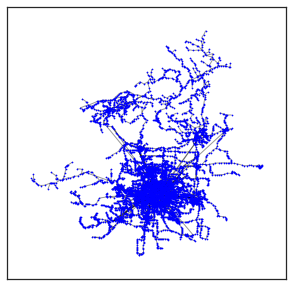

In [20]:
plt.figure(figsize=(5,5))
plt.style.use('seaborn-white')
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(G, pos,
                       node_size=0.5,
                       node_color="blue",
                       cmap=plt.cm.Reds_r)

In [22]:
# 1.1.2 地铁
gemm = gpd.GeoDataFrame(df4[['station','lng','lat']],
                          geometry=gpd.points_from_xy(df4['lng'],df4['lat'],crs='epsg:4326'))
gemm1=gemm.copy()
gemm1=gemm1.to_crs('epsg:32651')
gemm1.head()

# networkx
mmG = nx.Graph()
mmD=dfdxmmadj.values
mmc=coo_matrix(mmD)
mmedges=[(mmc.row[i],mmc.col[i]) for i in range(mmc.row.shape[0])]
mmG.add_edges_from(mmedges)
mmrws=list(dfdxmmadj.index)
mmattrs ={i:{'pos':[gemm1[gemm1['station']==mmrws[i]]['geometry'].x.values[0],
           gemm1[gemm1['station']==mmrws[i]]['geometry'].y.values[0]],
            'name':mmrws[i]} for i in range(len(list(mmG.nodes)))}
nx.set_node_attributes(mmG, mmattrs)
mmpos = nx.get_node_attributes(mmG, 'pos')
print(mmG.number_of_edges())

321


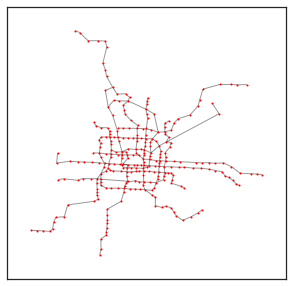

In [23]:
plt.figure(figsize=(5,5))
plt.style.use('seaborn-white')
nx.draw_networkx_edges(mmG, mmpos, alpha=0.4)
nx.draw_networkx_nodes(mmG, mmpos,
                       node_size=1,
                       node_color="red",
                       cmap=plt.cm.Reds_r)

In [24]:
df5=pd.concat([df3,df4])
gemmbs = gpd.GeoDataFrame(df5[['station','lng','lat']],
                          geometry=gpd.points_from_xy(df5['lng'],df5['lat'],crs='epsg:4326'))
gemmbs1=gemmbs.copy()
gemmbs1=gemmbs1.to_crs('epsg:32651')
gemmbs1.head()

sts=list(dfmmbsadj.columns)
mmbs=coo_matrix(dfmmbsadj.values)
# networkx
mmbsG = nx.Graph()
mmbsD=dfdxmmbsadj.values
mmbsc=coo_matrix(mmbsD)

mmbsedges=[(mmbsc.row[i],mmbsc.col[i]) for i in range(mmbsc.row.shape[0])]
mmbsG.add_edges_from(mmbsedges)

mmbsrws=list(dfdxmmbsadj.index)
mmbsattrs ={i:{'pos':[gemmbs1[gemmbs1['station']==mmbsrws[i]]['geometry'].x.values[0],
           gemmbs1[gemmbs1['station']==mmbsrws[i]]['geometry'].y.values[0]],
               'name':mmbsrws[i]} for i in range(len(list(mmbsG.nodes)))}
nx.set_node_attributes(mmbsG, mmbsattrs)
mmbspos = nx.get_node_attributes(mmbsG, 'pos')

In [28]:
mmbsattrs ={i:{'pos':[gemmbs1[gemmbs1['station']==mmbsrws[i]]['geometry'].x.values[0],
           gemmbs1[gemmbs1['station']==mmbsrws[i]]['geometry'].y.values[0]],
               'name':mmbsrws[i]} for i in range(len(list(mmbsG.nodes)))}

In [29]:
nx.set_node_attributes(mmbsG, mmbsattrs)
mmbspos = nx.get_node_attributes(mmbsG, 'pos')

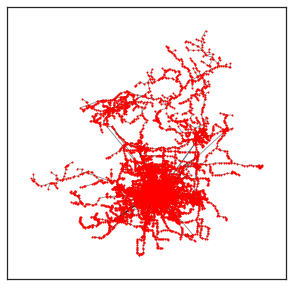

In [27]:
plt.figure(figsize=(5,5))
plt.style.use('seaborn-white')
nx.draw_networkx_edges(mmbsG, mmbspos, alpha=0.4)
nx.draw_networkx_nodes(mmbsG, mmbspos,
                       node_size=1,
                       node_color="red",
                       cmap=plt.cm.Reds_r)

In [27]:
import adjustText as aT 
from xpinyin import Pinyin 

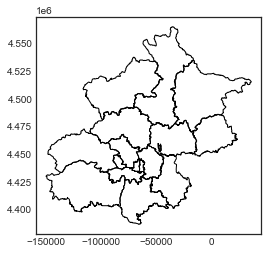

In [28]:
# 北京面域
beij=gpd.read_file('shapefile\\beij_fq.shp')
beij=beij.to_crs('epsg:32651')
beij.plot(facecolor='none',edgecolor='k')
beij_points=beij.copy()
beij_points["center"] = beij_points["geometry"].centroid
beij_points.set_geometry("center", inplace=True)
def trans_x(x):
    p = Pinyin()
    re1 = p.get_pinyin(x[:-1])
    re2= re1.split('-')
    re3=''.join(re2).capitalize()
    return re3

beij_points['县1']=beij_points['县'].apply(lambda x:trans_x(x))

font={'family':'serif',
     'style':'italic',
    'weight':'light',
      'color':'gray',
      'size':6
}

In [84]:
pos[i]

[-61402.08163123124, 4453889.502876873]

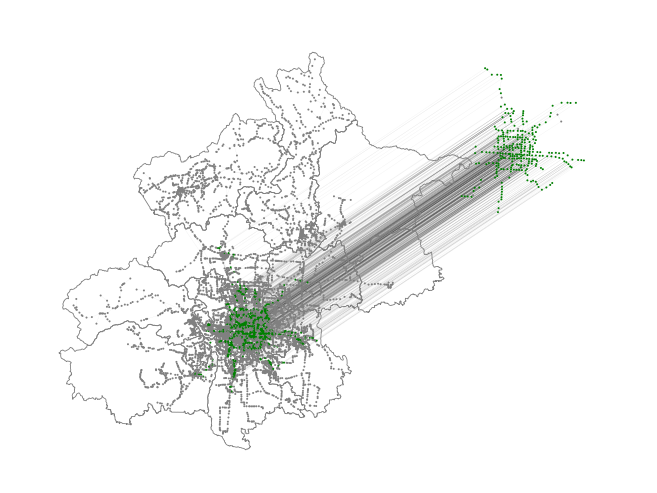

In [118]:
# 公交-地铁2d绘制
graph =mmbsG
# Layers have coordinates and colors
layers = [(G, (0, 0), "blue"),
          (mmG, (1, 2), "red")]
# node ranges in the graph
sts=list(dfdxmmbsadj.columns)
ranges = [(0, 7184), (7184, 7466)]

# fill the layers with nodes from the graph
# prepare the color map

# Calculate and move the nodes position
all_pos = {}
pos = nx.get_node_attributes(graph, 'pos')  # or spring_layout...
nas=nx.get_node_attributes(graph, 'name')

color_map=['green' for c in range(len(pos))]

for i in range(len(pos)):
    if nas[i][-1]=='m':
        sx=1.2
        sy=0.8
        all_pos[i]=pos[i]
        all_pos[i]=[pos[i][0]+100000* sx, pos[i][1]+100000 * sy]
        color_map[list(nas.keys()).index(i)]='gray'
    elif nas[i][-1]=='b':
        sx=0
        sy=0
        all_pos[i]=pos[i]
        all_pos[i]=[pos[i][0]+10 * sx, pos[i][1]+10 * sy]
        color_map[list(nas.keys()).index(i)]='gray'
for i in range(len(graph.edges())):
    edgi=list(graph.edges())[i]
    if nas[edgi[0]][-1]!=nas[edgi[1]][-1]:
        color_map[list(nas.keys()).index(edgi[0])]='g'
        color_map[list(nas.keys()).index(edgi[1])]='g'
# Draw and display the graph
fig,ax = plt.subplots(figsize=(12,6),dpi=200,frameon=True)

nx.draw(graph, all_pos, node_size=0.5,ax=ax,with_labels=False,
        node_color=color_map,
        linewidths=0.005,width=0.007)
beij.plot(ax=ax,facecolor='none',edgecolor='gray',linewidth=0.3)

plt.savefig(r'图\公交-地铁线网___二维1.png', dpi=300)

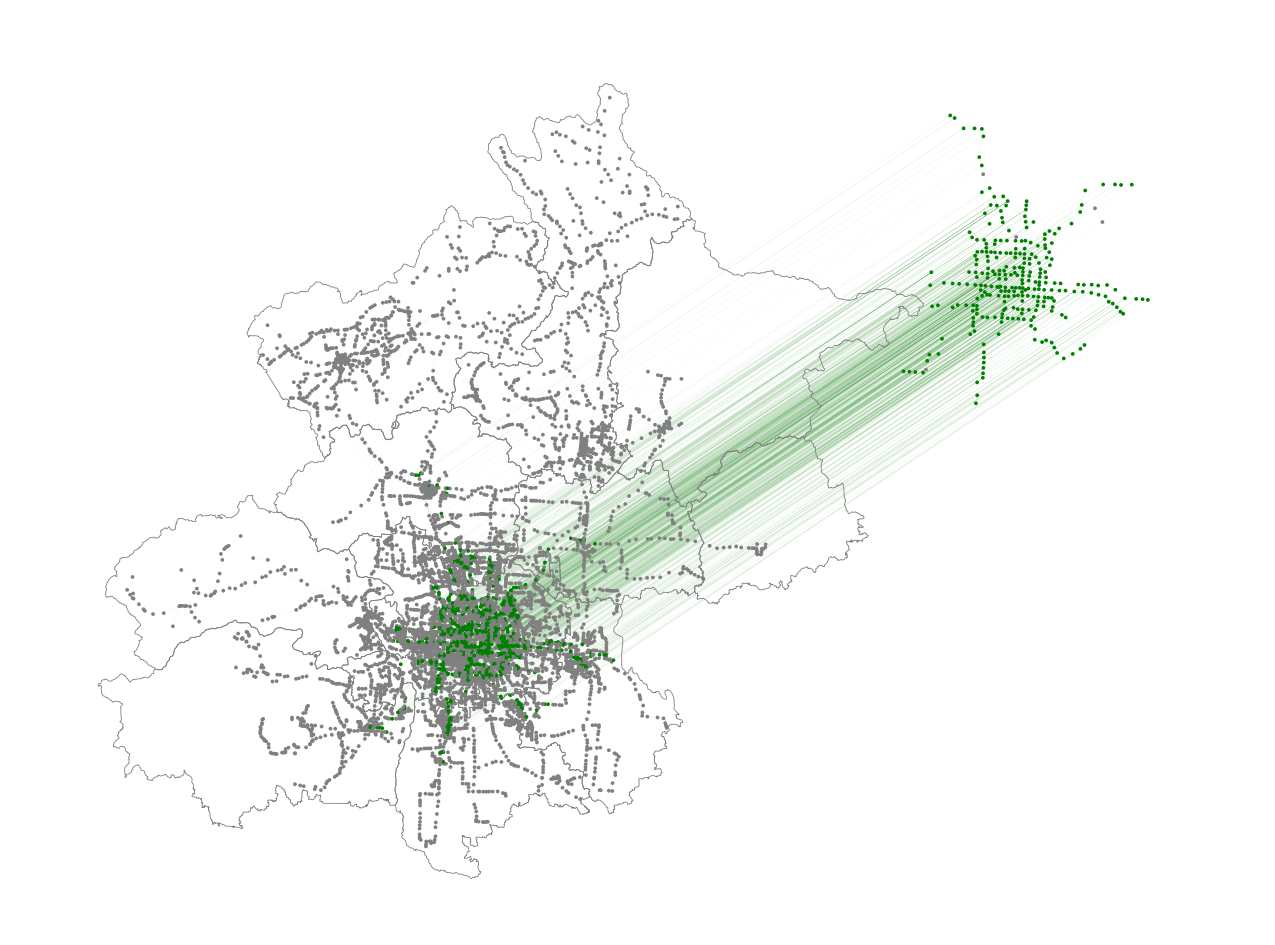

In [130]:
fig,ax = plt.subplots(figsize=(12,6),dpi=200,frameon=True)

nx.draw(graph, all_pos, node_size=1.8,ax=ax,with_labels=False,
        node_color=color_map,
        edge_color='g',
        linewidths=0.008,width=0.01)
beij.plot(ax=ax,facecolor='none',edgecolor='gray',linewidth=0.3)

plt.savefig(r'\公交-地铁线网___二维1.png', dpi=300)

In [131]:
# 公交-地铁线网的3d绘制
graph =mmbsG.copy()

sts=list(dfdxmmbsadj.columns)

# Calculate and move the nodes position
d3all_pos = {}
pos = nx.get_node_attributes(graph, 'pos')  # or spring_layout...
nas=nx.get_node_attributes(graph, 'name')
# 创建点的3D坐标
for i in range(len(pos)):
    if nas[i][-1]=='m':
        sx=0
        sy=0
        all_pos[i]=pos[i]
        all_pos[i]=[pos[i][0]+100000* sx, pos[i][1]+100000 * sy,0.5]

    elif nas[i][-1]=='b':
        sx=0
        sy=0
        all_pos[i]=pos[i]
        all_pos[i]=[pos[i][0]+10 * sx, pos[i][1]+10 * sy,0.25]

        --- #import plot_map
        # #设定显示范围
        
        # bounds = [115.47344, 39.49957,117.13324, 41.03132]
        
        # plot_map.set_mapboxtoken('pk.eyJ1IjoiYnkyMTEzMTE5IiwiYSI6ImNsMHQ3eHk1czBhc2czcHBibGdpOGtwdW4ifQ.3oNBD-J4ELzm793CMhUwGA')
        
        # plot_map.set_imgsavepath(r'D:\python_learn\mapbox\\')
        
        # fig,ax = plt.subplots(figsize=(2,2))
        
        # plot_map.plot_map(ax ,bounds,zoom =1,style =5)  

In [141]:
# 公交-地铁线网的3d绘制
def intdNetworkDraw(mmbsG,all_pos, nodeSize):
    """ Draw Interdependent Network

    Refer to each node's 3D coordinates.

    Parameters
    ----------
    intd_G : Interdependent Network Graph from the method 'intd_RAND_networks'

    """
    sx=1
    sx1=1
    intd_G=mmbsG
    fig = plt.figure(figsize=(40,40),dpi=300)
    ax = plt.axes(projection='3d')
    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    n_attr = all_pos

    for node in n_attr.keys():
        pos = n_attr[node]
        x, y, z = [i for i in pos]
        if z==0.25:
            ax.scatter(x, y, z, c='r', s=nodeSize)
        else:
            ax.scatter(x, y, z*sx, c='g', s=nodeSize)
    for edge in list(intd_G.edges):

        pos_a, pos_b = [n_attr[i] for i in edge]
        x_a, y_a, z_a = [i for i in pos_a]
        x_b, y_b, z_b = [i for i in pos_b]

        if z_a != z_b:
            alpha = 0.2  # If the edge connect two nodes in different layer, the edge transparency set differently.
            ax.plot([x_a, x_b], [y_a, y_b], [z_a*sx1, z_b*sx1], color="aqua",linewidth=0.4,alpha=alpha) # color='deepskyblue'
        else:
            alpha = 1
            ax.plot([x_a, x_b], [y_a, y_b], [z_a*sx1, z_b*sx1], color="tab:gray",linewidth=2,alpha=alpha)
    # ax.set_axis_off()
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    for line in ax.xaxis.get_ticklines():
        line.set_visible(False)
    for line in ax.yaxis.get_ticklines():
        line.set_visible(False)
    for line in ax.zaxis.get_ticklines():
        line.set_visible(False)
    ax.set_zlim(0, 0.5)
    # ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.5, 0.5, 1,1]))
    plt.axis('off')
    plt.show()
    # plt.gca().set_box_aspect((5, 5, 1)) 
    ax.tick_params(axis='z',labelsize=0.000002)
    fig.savefig(r'\地铁_公交线网1.png', dpi=300)
    return

In [301]:
# 公交-地铁线网的3d绘制
def intdNetworkDraw2(mmbsG,all_pos, nodeSize,ax3):
    sx=1
    sx1=1
    intd_G=mmbsG
    ax=ax3
    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    n_attr = all_pos

    for node in n_attr.keys():
        pos = n_attr[node]
        x, y, z = [i for i in pos]
        if z==0.25:
            ax.scatter(x, y, z, c='r', s=nodeSize)
        else:
            ax.scatter(x, y, z*sx, c='g', s=nodeSize)
    for edge in list(intd_G.edges):

        pos_a, pos_b = [n_attr[i] for i in edge]
        x_a, y_a, z_a = [i for i in pos_a]
        x_b, y_b, z_b = [i for i in pos_b]

        if z_a != z_b:
            alpha = 0.2  # If the edge connect two nodes in different layer, the edge transparency set differently.
            ax.plot([x_a, x_b], [y_a, y_b], [z_a*sx1, z_b*sx1], color="aqua",linewidth=0.1,alpha=alpha) # color='deepskyblue'
        else:
            alpha = 1
            ax.plot([x_a, x_b], [y_a, y_b], [z_a*sx1, z_b*sx1], color="tab:gray",linewidth=0.4,alpha=alpha)
    # ax.set_axis_off()
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    for line in ax.xaxis.get_ticklines():
        line.set_visible(False)
    for line in ax.yaxis.get_ticklines():
        line.set_visible(False)
    for line in ax.zaxis.get_ticklines():
        line.set_visible(False)
    ax.set_zlim(0, 0.5)
    # ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.5, 0.5, 1,1]))
    # plt.gca().set_box_aspect((5, 5, 1)) 
    ax.tick_params(axis='z',labelsize=0.000002)
    return

10521
321


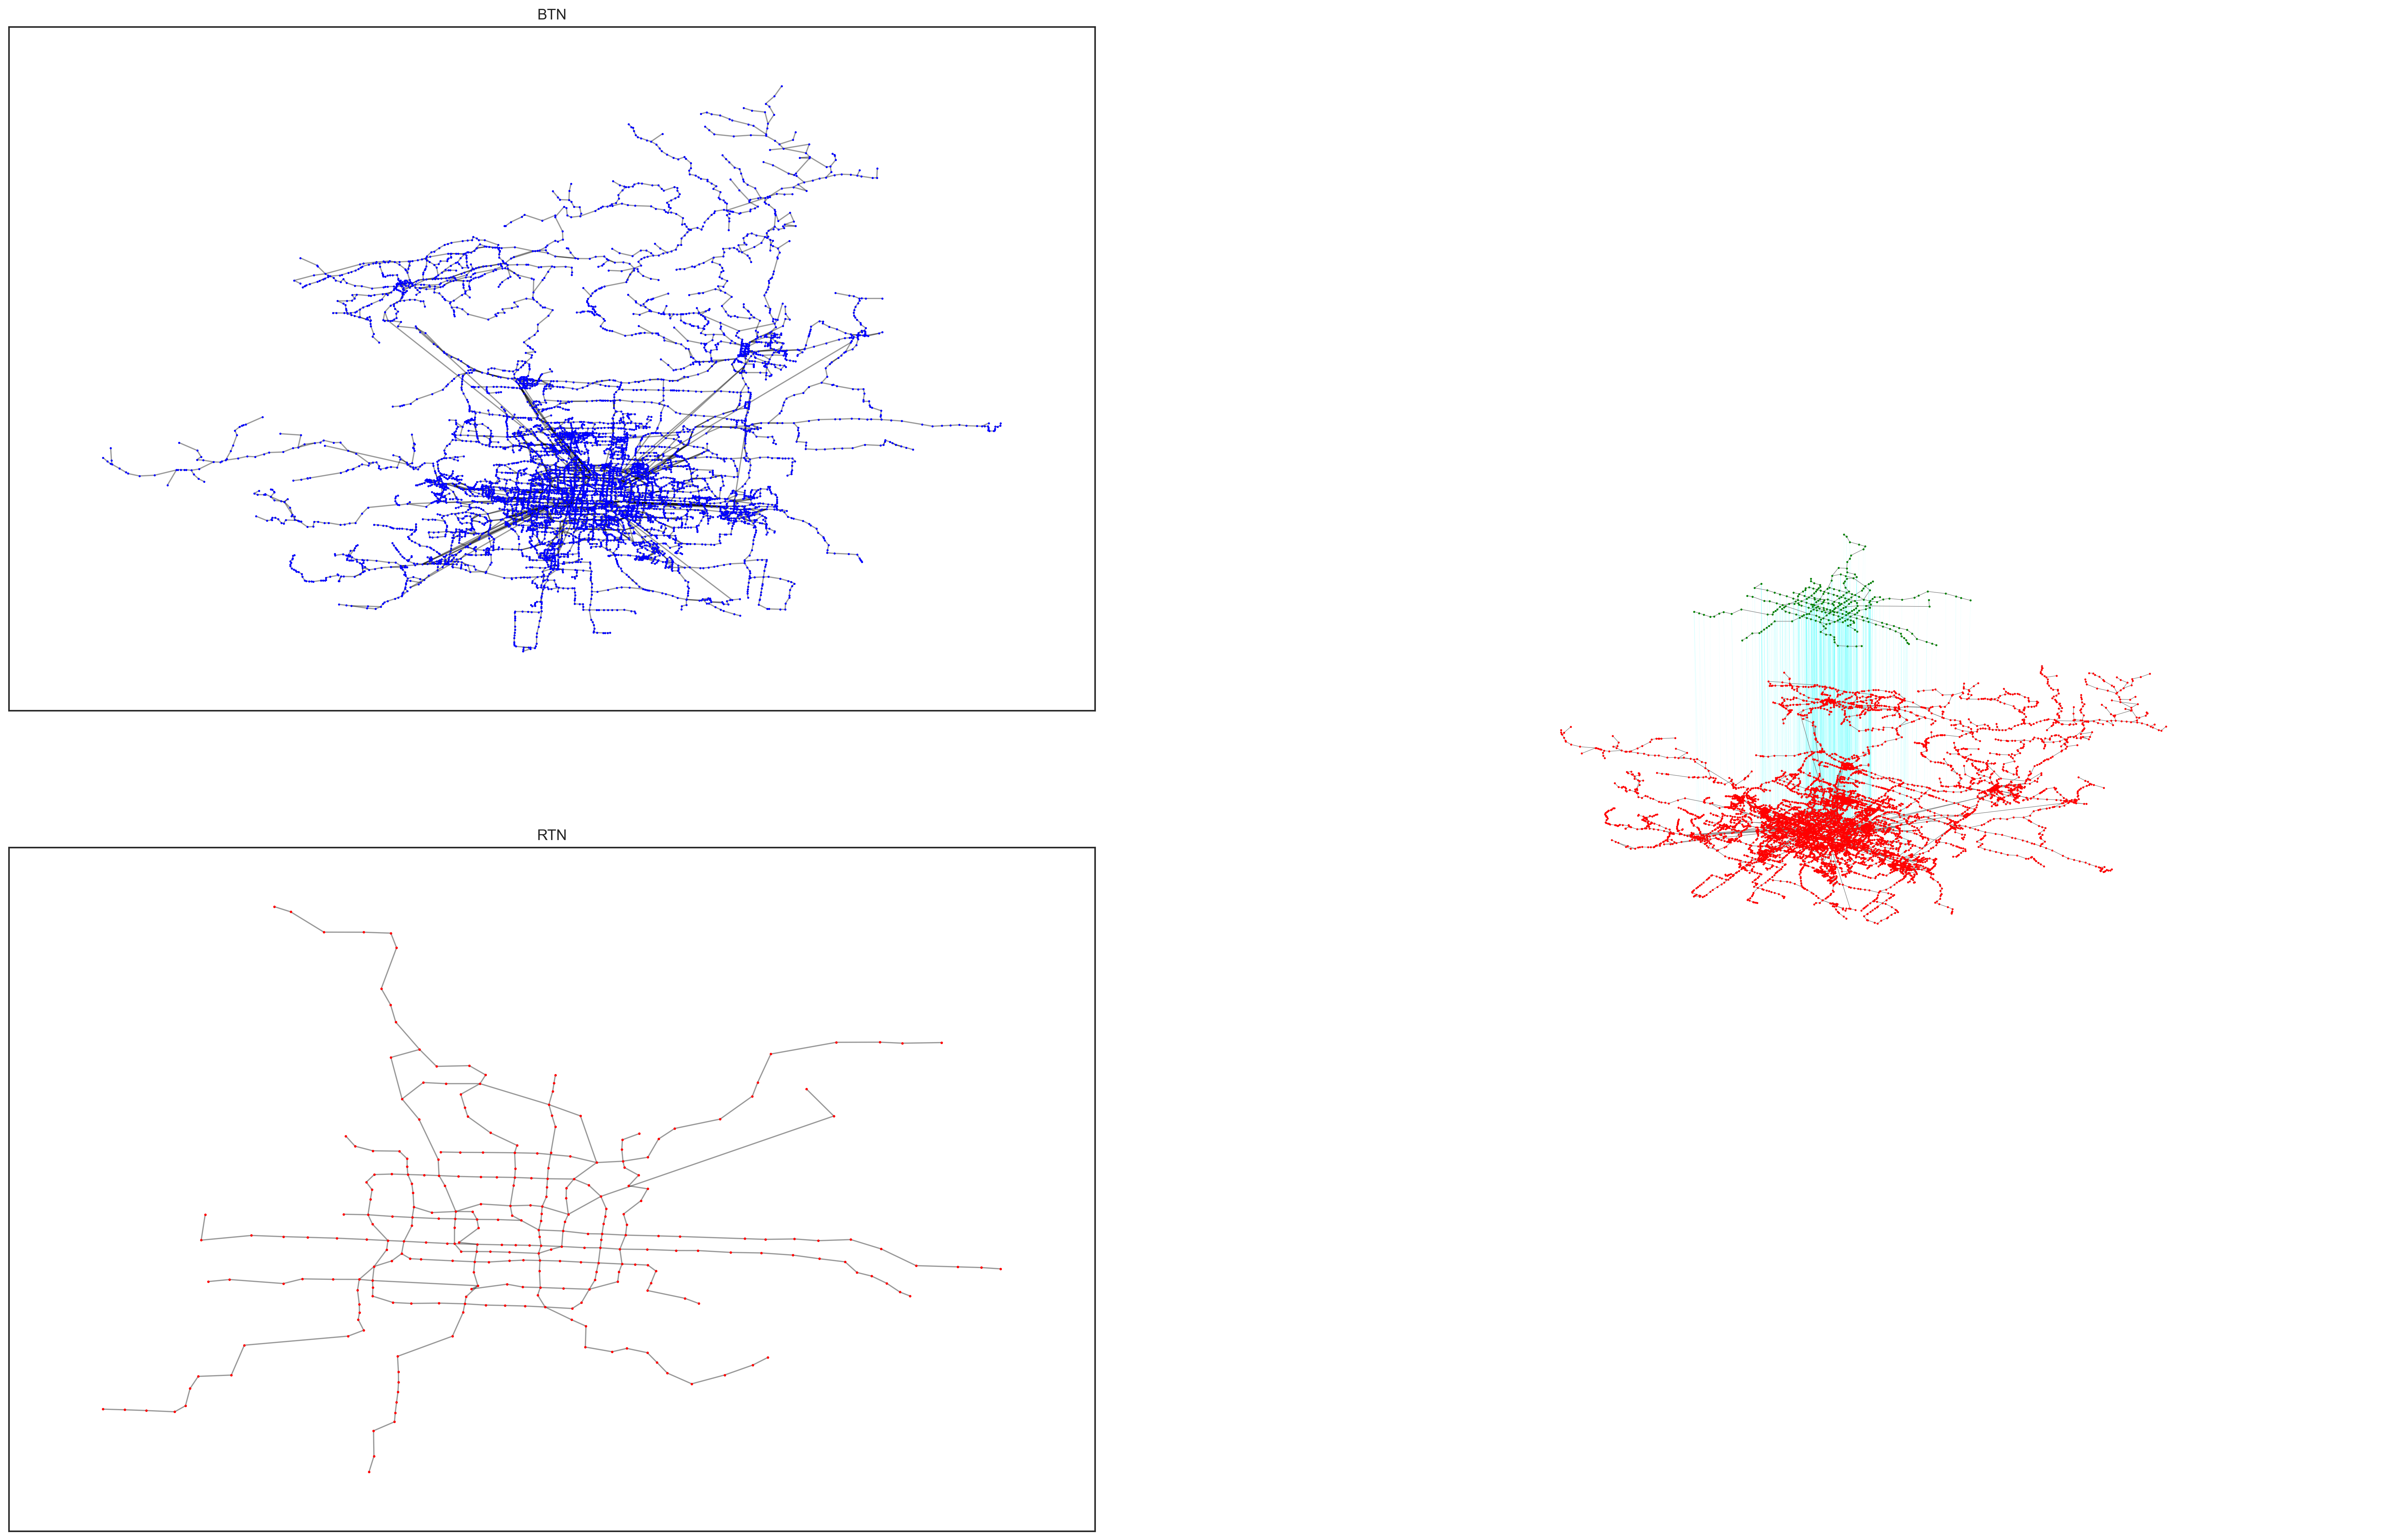

In [302]:
## 图形合并

fig = plt.figure(figsize=(30,20),dpi=300)
# plt.style.use('seaborn-white')
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.9)

# 创建网络图，network的graph格式
# 1.1.1 公交
G = nx.Graph()
D=dfdxbsadj.values
c=coo_matrix(D)
edges=[(c.row[i],c.col[i]) for i in range(c.row.shape[0])]
G.add_edges_from(edges)
rws=list(dfdxbsadj.index)
attrs ={i:{'pos':[gebs1[gebs1['station']==rws[i]]['geometry'].x.values[0],
           gebs1[gebs1['station']==rws[i]]['geometry'].y.values[0]],
          'name':rws[i]} for i in range(len(list(G.nodes)))}
nx.set_node_attributes(G, attrs)
pos = nx.get_node_attributes(G, 'pos')
print(G.number_of_edges())

# 【绘图1：Buses】
ax1=plt.subplot(221)
nx.draw_networkx_edges(G, pos, ax=ax1,alpha=0.4)
nx.draw_networkx_nodes(G, pos,ax=ax1,
                       node_size=0.5,
                       node_color="blue",
                       cmap=plt.cm.Reds_r)
ax1.set_title('BTN')
# 1.1.2 地铁
gemm = gpd.GeoDataFrame(df4[['station','lng','lat']],
                          geometry=gpd.points_from_xy(df4['lng'],df4['lat'],crs='epsg:4326'))
gemm1=gemm.copy()
gemm1=gemm1.to_crs('epsg:32651')
gemm1.head()

# networkx
mmG = nx.Graph()
mmD=dfdxmmadj.values
mmc=coo_matrix(mmD)
mmedges=[(mmc.row[i],mmc.col[i]) for i in range(mmc.row.shape[0])]
mmG.add_edges_from(mmedges)
mmrws=list(dfdxmmadj.index)
mmattrs ={i:{'pos':[gemm1[gemm1['station']==mmrws[i]]['geometry'].x.values[0],
           gemm1[gemm1['station']==mmrws[i]]['geometry'].y.values[0]],
            'name':mmrws[i]} for i in range(len(list(mmG.nodes)))}
nx.set_node_attributes(mmG, mmattrs)
mmpos = nx.get_node_attributes(mmG, 'pos')
print(mmG.number_of_edges())

# 【绘图2：metro】
ax2=plt.subplot(223)
nx.draw_networkx_edges(mmG, mmpos,ax=ax2, alpha=0.4)
nx.draw_networkx_nodes(mmG, mmpos,ax=ax2,
                       node_size=1,
                       node_color="red",
                       cmap=plt.cm.Reds_r)
ax2.set_title('RTN')


# 【绘图3：bus-metro】

ax3 = plt.subplot(122, projection='3d')
intdNetworkDraw2(mmbsG,all_pos, 0.4,ax3)

fig.savefig(r'图\地铁_公交线网11.png', dpi=800) 
plt.axis('off')
plt.show()


##  1.2 characteristics analysis

In [29]:
from scipy.stats import norm
from scipy.optimize import curve_fit
import seaborn as sns
from scipy import stats

In [30]:
def cal_correlation_matrix(g):
    degs = g.degree()
    vdegs=pd.DataFrame(degs)[1].to_list()
    max_k = max(vdegs)
    emat = np.zeros((max_k+1, max_k+1))
    cmat = np.zeros((max_k+1, max_k+1))
    L = g.number_of_edges()
    for i,j in g.edges():
        ki = degs[i]
        kj = degs[j]
        emat[ki,kj] += 1.0/2/L
        emat[kj,ki] += 1.0/2/L
        cmat[ki,kj] += 2.0*L/ki/kj
        cmat[kj,ki] += 2.0*L/ki/kj
    return emat,cmat

In [31]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

[Text(0, 0.5, '1.0'),
 Text(0, 1.5, '2.0'),
 Text(0, 2.5, '3.0'),
 Text(0, 3.5, '4.0'),
 Text(0, 4.5, '5.0'),
 Text(0, 5.5, '6.0'),
 Text(0, 6.5, '7.0'),
 Text(0, 7.5, '8.0'),
 Text(0, 8.5, '9.0'),
 Text(0, 9.5, '10.0'),
 Text(0, 10.5, '11.0'),
 Text(0, 11.5, '12.0'),
 Text(0, 12.5, '13.0'),
 Text(0, 13.5, '14.0'),
 Text(0, 14.5, '15.0'),
 Text(0, 15.5, '16.0'),
 Text(0, 16.5, '17.0')]

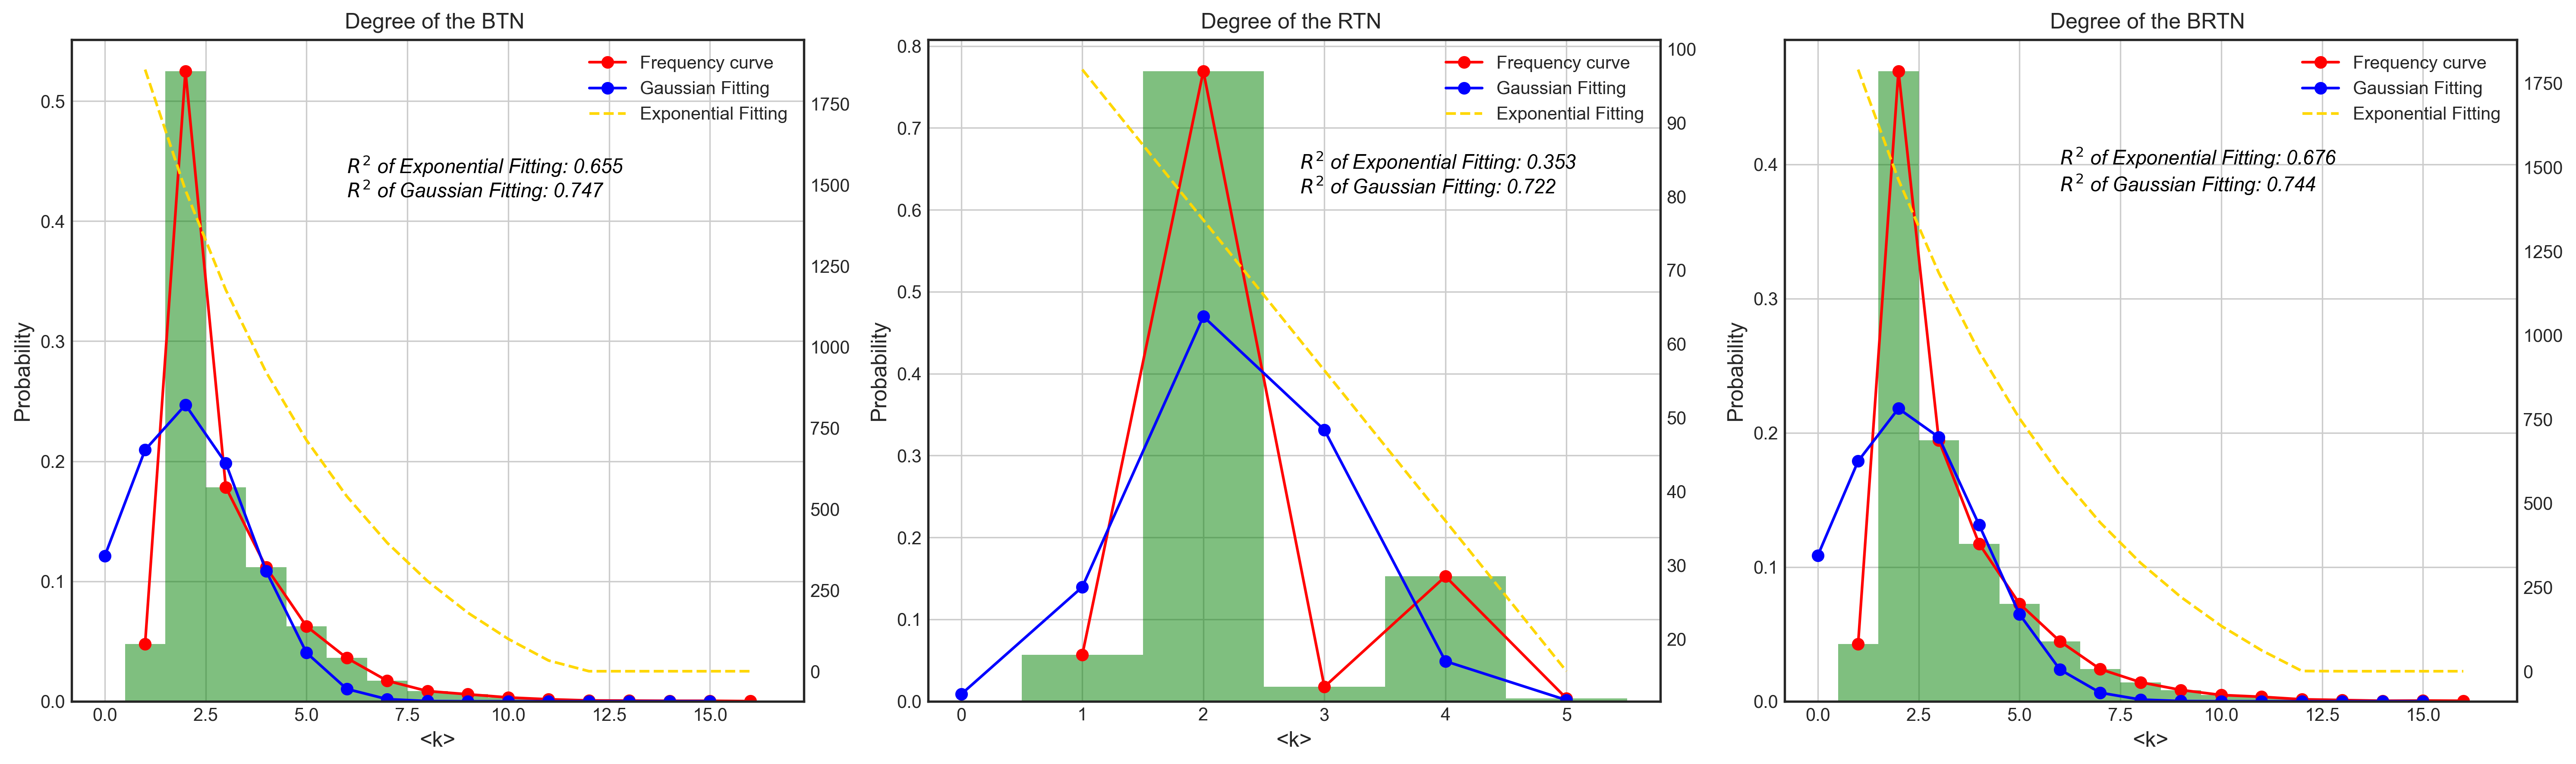

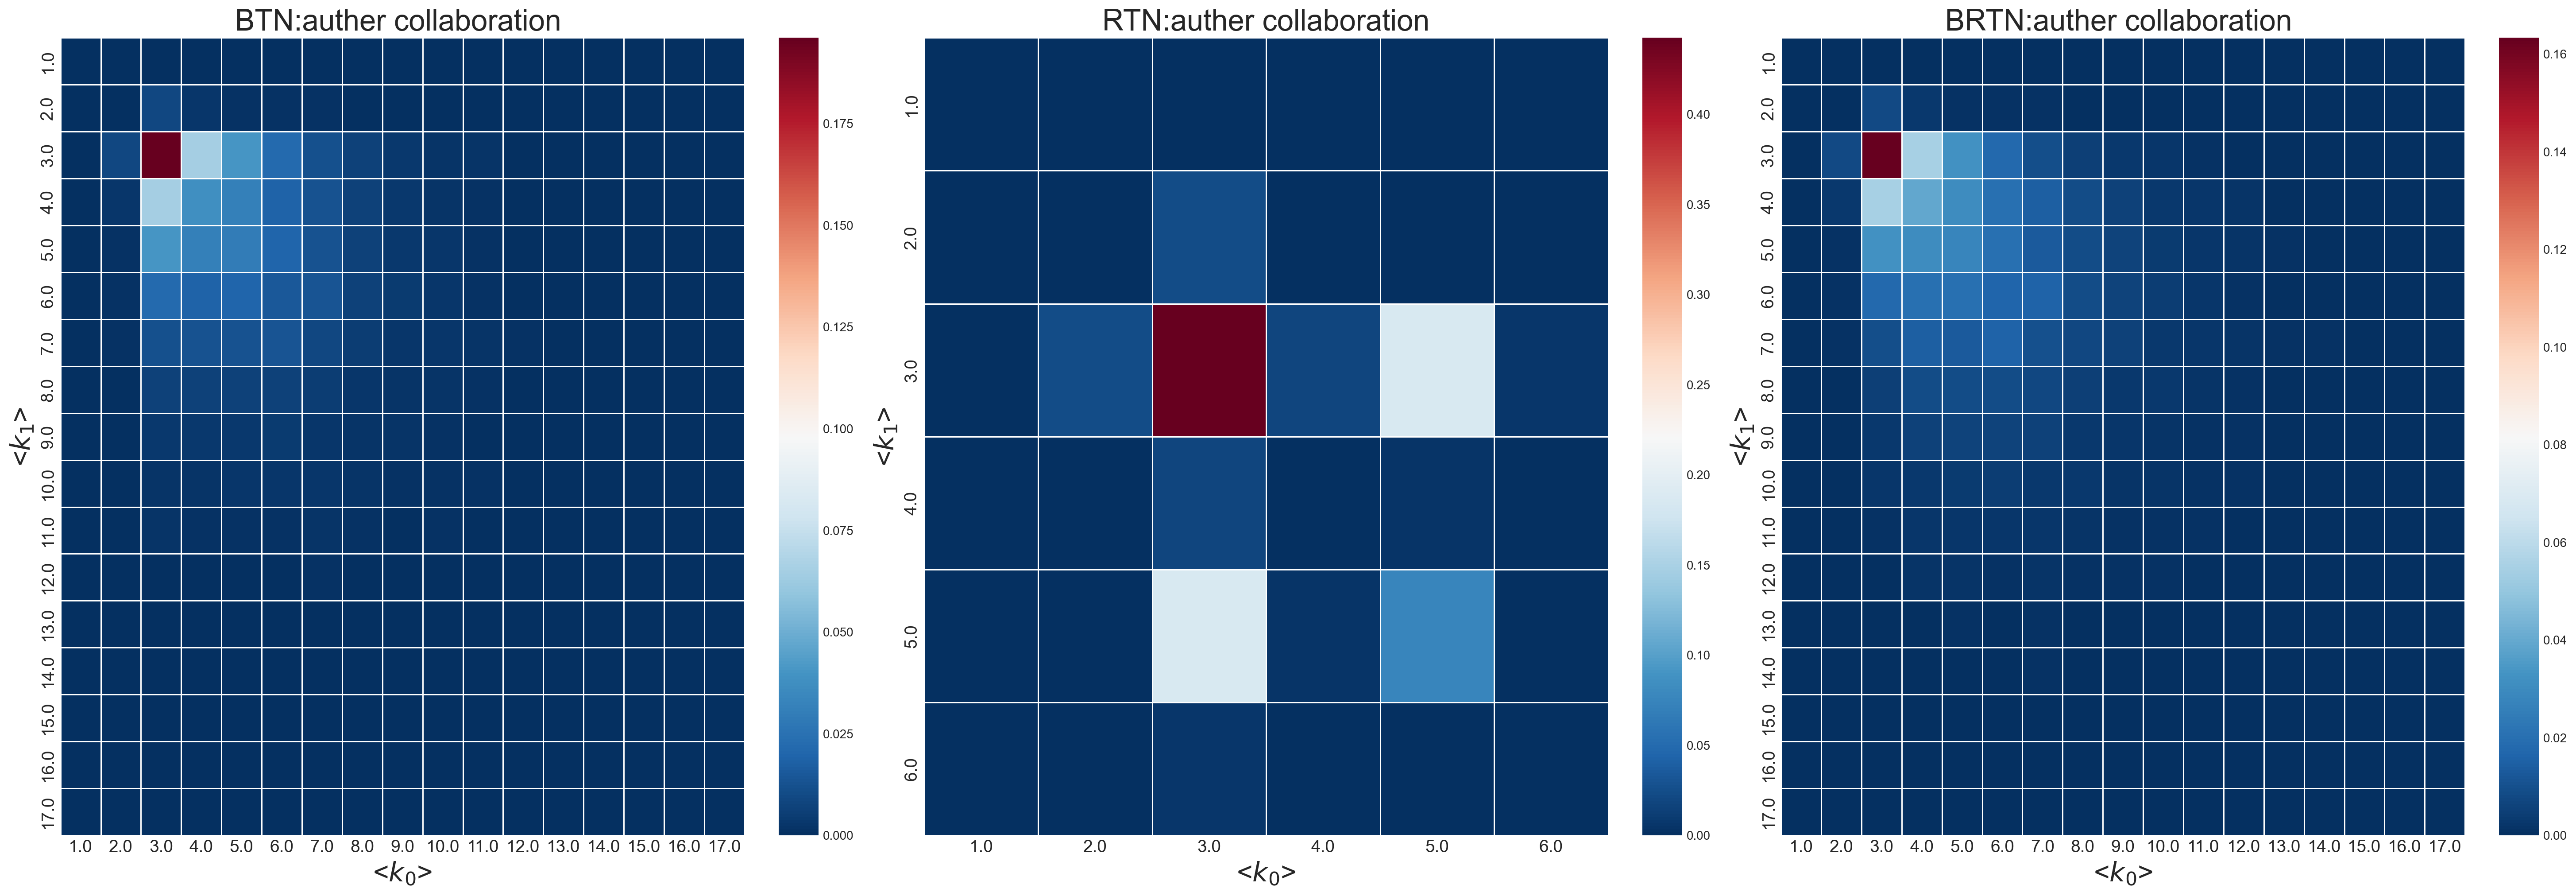

In [32]:
# G,mmG,mmbsG
## 节点的度分布
bsdg = nx.degree(G) #公交
bsdg=pd.DataFrame(bsdg)[1].to_list()
mmdg = nx.degree(mmG) #地铁
mmdg=pd.DataFrame(mmdg)[1].to_list()
mmbsdg = nx.degree(mmbsG) #公交-地铁
mmbsdg=pd.DataFrame(mmbsdg)[1].to_list()
# for c in range(len(mmdg)):
#     if mmdg[c]==3:
#         mmdg[c]=4
# 度分布及拟合
bsbins = np.arange(min(bsdg)-0.5, max(bsdg)+1, 1.0)
mmbins = np.arange(min(mmdg)-0.5, max(mmdg)+1, 1.0)
mmbsbins = np.arange(min(mmbsdg)-0.5, max(mmbsdg)+1, 1.0)

# 绘图
fig,ax = plt.subplots(1,3,figsize=(20,6),dpi=300)
# 公交
# # 拟合正态分布
ybs,xbs, bspatche=ax[0].hist(bsdg, bins = bsbins,density=True,
                        facecolor='green', alpha=0.5)
bsmu =np.mean(list(bsdg)) #计算均值 
bssigma =np.std(list(bsdg)) 
bsy = norm.pdf(np.fix(xbs[1::]), bsmu, bssigma)
ba1=ax[0].plot(np.fix(xbs[1::]), ybs, 'ro-',label='Frequency curve')
ba2=ax[0].plot(np.fix(xbs[:-1]),bsy, 'bo-',label='Gaussian Fitting')

# 拟合幂律分布
popt, pcov = curve_fit(func,np.fix(xbs[1::]),ybs*len(bsdg))
y2 = [func(i, popt[0],popt[1],popt[2]) for i in np.fix(xbs[1::])]
for i in range(len(y2)):
    if y2[i]<=0:
        y2[i]=0
ax11=ax[0].twinx()
ba3=ax11.plot(np.fix(xbs[1::]),y2,color='gold',linestyle='--',label='Exponential Fitting')
# ax11.set_ylim(bottom=0.)

ax[0].grid(True)
ax[0].set_title(f'Degree of the BTN ')
ax[0].set_xlabel('<k>', fontsize=12)
ax[0].set_ylabel('Probability', fontsize=12) 

baxx2=ba1+ba2+ba3
blabs1=[l.get_label() for l in baxx2]
ax[0].legend(baxx2,blabs1,loc=0)

# 地铁
ymm,xmm, mmpatche=ax[1].hist(mmdg, bins = mmbins,density=True,
                        facecolor='green', alpha=0.5)
mmmu =np.mean(list(mmdg)) #计算均值 
mmsigma =np.std(list(mmdg)) 
mmy = norm.pdf(np.fix(xmm), mmmu, mmsigma)
ma1=ax[1].plot(np.fix(xmm[1::]), ymm, 'ro-',label='Frequency curve')
ma2=ax[1].plot(np.fix(xmm), mmy, 'bo-',label='Gaussian Fitting')
# 拟合幂律分布
mmpopt, mmpcov = curve_fit(func,np.fix(xmm[1::]),ymm*len(mmdg),maxfev=500000)
mmy2 = [func(i, mmpopt[0],mmpopt[1],mmpopt[2]) for i in np.fix(xmm[1::])]
for i in range(len(mmy2)):
    if mmy2[i]<=0:
        mmy2[i]=0
ax22=ax[1].twinx()
ma3=ax22.plot(np.fix(xmm[1::]),mmy2,color='gold',linestyle='--',label='Exponential Fitting')

ax[1].grid(True)
ax[1].set_title(f'Degree of the RTN ')
ax[1].set_xlabel('<k>', fontsize=12)
ax[1].set_ylabel('Probability', fontsize=12)

maxx2=ma1+ma2+ma3
mlabs1=[l.get_label() for l in maxx2]
ax[1].legend(maxx2,mlabs1,loc=0)


# 公交-地铁
ymmbs,xmmbs, mmbspatche=ax[2].hist(mmbsdg, bins = mmbsbins,density=True,
                        facecolor='green', alpha=0.5)
mmbsmu =np.mean(list(mmbsdg)) #计算均值 
mmbssigma =np.std(list(mmbsdg)) 
mmbsy = norm.pdf(np.fix(xmmbs[1::]), mmbsmu, mmbssigma)
a1=ax[2].plot(np.fix(xmmbs[1::]), ymmbs, 'ro-',label='Frequency curve')
a2=ax[2].plot(np.fix(xmmbs[:-1]), mmbsy, 'bo-',label='Gaussian Fitting')

mmbspopt, mmbspcov = curve_fit(func,np.fix(xmmbs[1::]),ymmbs*len(mmbsdg))
mmbsy2 = [func(i, mmbspopt[0],mmbspopt[1],mmbspopt[2]) for i in np.fix(xmmbs[1::])]
for i in range(len(mmbsy2)):
    if mmbsy2[i]<=0:
        mmbsy2[i]=0
ax33=ax[2].twinx()
a3=ax33.plot(np.fix(xmmbs[1::]),mmbsy2,color='gold',linestyle='--',label='Exponential Fitting')
ax[2].grid(True)
ax[2].set_title(f'Degree of the BRTN ')
ax[2].set_xlabel('<k>', fontsize=12) 
ax[2].set_ylabel('Probability', fontsize=12)
axx2=a1+a2+a3
labs1=[l.get_label() for l in axx2]
ax[2].legend(axx2,labs1,loc=0)

# R2
bslope, bintercept, br_value, bp_value, bstd_err = stats.linregress(ybs*len(bsdg), y2) 
ax[0].text(6, 0.44, '$R^2$ of Exponential Fitting: %s'%(round(br_value,3)), style ='italic', 
        fontsize = 11, color ="black")
bslope1, bintercept1, br_value1, bp_value1, bstd_err1 = stats.linregress(ybs, bsy) 
ax[0].text(6, 0.42, '$R^2$ of Gaussian Fitting: %s'%(round(br_value1,3)), style ='italic', 
        fontsize = 11, color ="black")

mslope, mintercept, mr_value, mp_value, mstd_err = stats.linregress(ymm*len(mmdg), mmy2) 
ax[1].text(2.8, 0.65, '$R^2$ of Exponential Fitting: %s'%(round(mr_value,3)), style ='italic', 
        fontsize = 11, color ="black")
bslope2, bintercept2, br_value2, bp_value2, bstd_err2 = stats.linregress(mmy[1::], ymm) 
ax[1].text(2.8, 0.62, '$R^2$ of Gaussian Fitting: %s'%(round(br_value2,3)), style ='italic', 
        fontsize = 11, color ="black")


slope, intercept, r_value, p_value, std_err = stats.linregress(ymmbs*len(mmbsdg), mmbsy2) 
ax[2].text(6, 0.4, '$R^2$ of Exponential Fitting: %s'%(round(r_value,3)), style ='italic', 
        fontsize = 11, color ="black")
bslope3, bintercept3, br_value3, bp_value3, bstd_err3 = stats.linregress(mmbsy, ymmbs) 
ax[2].text(6, 0.38, '$R^2$ of Gaussian Fitting: %s'%(round(br_value3,3)), style ='italic', 
        fontsize = 11, color ="black")
fig.tight_layout()
# fig.savefig(r'D:\博士\弹性\稿\图\degree distribution1.png', dpi=800)

# 节点度的自相关矩阵
# # 公交
# fig,ax = plt.subplots(1,3,figsize=(20,20),constrained_layout=True,dpi=800)
# emat_coll,cmat_coll = cal_correlation_matrix(G)
# ax[0].imshow(emat_coll, cmap = 'OrRd')
# ax[0].set_xlabel('<$k_0$>', fontsize=12)
# ax[0].set_ylabel('<$k_1$>', fontsize=12)
# ax[0].set_title(f'BTN:auther collaboration ')

# # 地铁
# mmemat_coll,mmcmat_coll = cal_correlation_matrix(mmG)
# ax1=ax[1].imshow(mmemat_coll, cmap = 'OrRd',vmin=0,vmax=1)
# ax[1].set_xlabel('<$k_0$>', fontsize=12)
# ax[1].set_ylabel('<$k_1$>', fontsize=12)
# ax[1].set_title(f'RTN:auther collaboration ')
# # plt.colorbar(ax1,fraction=0.045,ticks=np.linspace(0,1,5))
# # 公交-地铁
# mmbsemat_coll,mmbscmat_coll = cal_correlation_matrix(mmbsG)
# ax2=ax[2].imshow(mmbsemat_coll, cmap = 'OrRd',vmin=0,vmax=1) # Reds
# ax[2].set_xlabel('<$k_0$>', fontsize=12) 
# ax[2].set_ylabel('<$k_1$>', fontsize=12) 
# ax[2].set_title(f'BRTN:auther collaboration ')
# # fig.colorbar(ax2,fraction=0.045,ticks=np.linspace(0,1,5),cax=[])
# fig.tight_layout()
# fig.savefig(r'D:\博士\弹性\稿\图\auther collaboration.png', dpi=800)


fig,ax = plt.subplots(1,3,figsize=(29,10),constrained_layout=True,dpi=200)
#  公交
emat_coll,cmat_coll = cal_correlation_matrix(G)
sns.heatmap(emat_coll,ax=ax[0],linewidths=.5,cmap='RdBu_r')
ax[0].set_xlabel('<$k_0$>', fontsize=22)
ax[0].set_ylabel('<$k_1$>', fontsize=22)
ax[0].set_title(f'BTN:auther collaboration ',fontsize=24)
ax[0].set_xticklabels(labels=np.linspace(1,emat_coll.shape[0],emat_coll.shape[0]),fontsize=14)
ax[0].set_yticklabels(labels=np.linspace(1,emat_coll.shape[0],emat_coll.shape[0]),fontsize=14)
# 地铁
mmemat_coll,mmcmat_coll = cal_correlation_matrix(mmG)
sns.heatmap(mmemat_coll,ax=ax[1],linewidths=.5,cmap='RdBu_r')
ax[1].set_xlabel('<$k_0$>', fontsize=22)
ax[1].set_ylabel('<$k_1$>', fontsize=22)
ax[1].set_title(f'RTN:auther collaboration',fontsize=24)
ax[1].set_xticklabels(labels=np.linspace(1,mmemat_coll.shape[0],mmemat_coll.shape[0]),fontsize=14)
ax[1].set_yticklabels(labels=np.linspace(1,mmemat_coll.shape[0],mmemat_coll.shape[0]),fontsize=14)
# 公交-地铁
mmbsemat_coll,mmbscmat_coll = cal_correlation_matrix(mmbsG)

sns.heatmap(mmbsemat_coll,ax=ax[2],linewidths=.5,cmap='RdBu_r')
ax[2].set_xlabel('<$k_0$>', fontsize=22) 
ax[2].set_ylabel('<$k_1$>', fontsize=22) 
ax[2].set_title(f'BRTN:auther collaboration ',fontsize=24)
ax[2].set_xticklabels(labels=np.linspace(1,mmbsemat_coll.shape[0],mmbsemat_coll.shape[0]),fontsize=14)
ax[2].set_yticklabels(labels=np.linspace(1,mmbsemat_coll.shape[0],mmbsemat_coll.shape[0]),fontsize=14)


In [153]:
xbs

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5])

In [152]:
ybs,np.ceil(xbs)

(array([4.78841871e-02, 5.25055679e-01, 1.78312918e-01, 1.11636971e-01,
        6.25000000e-02, 3.60523385e-02, 1.71213808e-02, 8.49109131e-03,
        5.84632517e-03, 3.20155902e-03, 1.67037862e-03, 6.95991091e-04,
        5.56792873e-04, 4.17594655e-04, 4.17594655e-04, 1.39198218e-04]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17.]))

In [154]:
ymmbs,np.ceil(xmmbs)

(array([4.27270292e-02, 4.69595500e-01, 1.94481650e-01, 1.17331905e-01,
        7.27297080e-02, 4.47361372e-02, 2.39753549e-02, 1.41976962e-02,
        8.43825342e-03, 4.68791856e-03, 3.34851326e-03, 1.47334583e-03,
        9.37583713e-04, 4.01821591e-04, 5.35762122e-04, 4.01821591e-04]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17.]))

In [198]:
len(ymmbs),len(np.ceil(xmmbs[:-1])),ymmbs,np.ceil(xmmbs)

(16,
 16,
 array([4.27270292e-02, 4.69595500e-01, 1.94481650e-01, 1.17331905e-01,
        7.27297080e-02, 4.47361372e-02, 2.39753549e-02, 1.41976962e-02,
        8.43825342e-03, 4.68791856e-03, 3.34851326e-03, 1.47334583e-03,
        9.37583713e-04, 4.01821591e-04, 5.35762122e-04, 4.01821591e-04]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17.]))

In [179]:
xmm

array([1., 2., 3., 4., 5., 6.])

In [181]:
xmm[:-1]

array([1., 2., 3., 4., 5.])

In [171]:
np.ceil(xbs)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17.])

In [193]:
len(xmmbs),len(mmbsy),xmmbs,mmbsy

(17,
 16,
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17.]),
 array([1.08592444e-01, 1.78929867e-01, 2.18141709e-01, 1.96773780e-01,
        1.31331343e-01, 6.48548096e-02, 2.36967417e-02, 6.40630663e-03,
        1.28144347e-03, 1.89654794e-04, 2.07682949e-05, 1.68271475e-06,
        1.00877150e-07, 4.47453334e-09, 1.46850469e-10, 3.56595261e-12]))

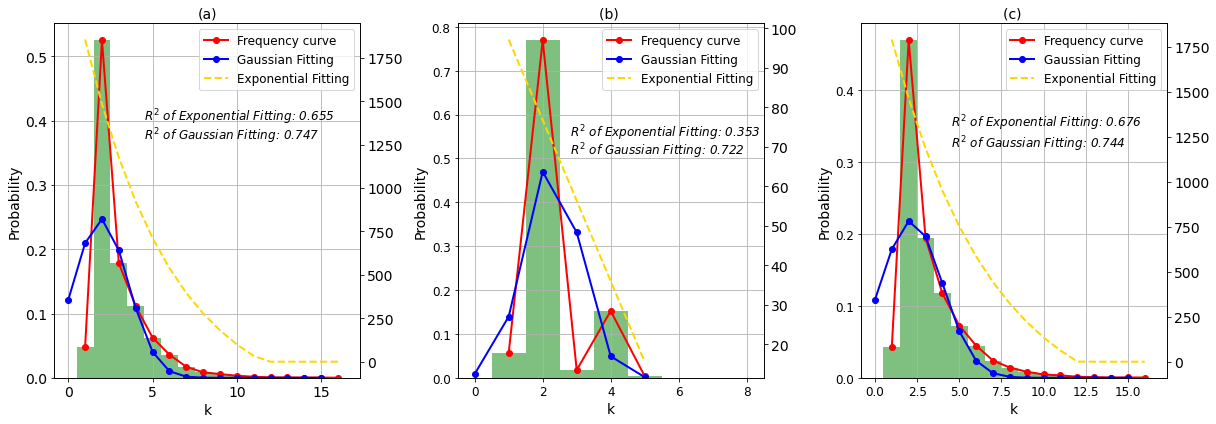

In [145]:
# G,mmG,mmbsG
## 节点的度分布

bsdg = nx.degree(G) #公交
bsdg=pd.DataFrame(bsdg)[1].to_list()
mmdg = nx.degree(mmG) #地铁
mmdg=pd.DataFrame(mmdg)[1].to_list()
mmbsdg = nx.degree(mmbsG) #公交-地铁
mmbsdg=pd.DataFrame(mmbsdg)[1].to_list()
# for c in range(len(mmdg)):
#     if mmdg[c]==3:
#         mmdg[c]=4
# 度分布及拟合
bsbins = np.arange(min(bsdg)-0.5, max(bsdg)+1, 1.0)
mmbins = np.arange(min(mmdg)-0.5, max(mmdg)+1, 1.0)
mmbsbins = np.arange(min(mmbsdg)-0.5, max(mmbsdg)+1, 1.0)

# 绘图
fig,ax = plt.subplots(1,3,figsize=(17,6),constrained_layout=True)
fig.set_facecolor('white')
# 公交
# # 拟合正态分布
ybs,xbs, bspatche=ax[0].hist(bsdg, bins = bsbins,density=True,
                        facecolor='green', alpha=0.5)
bsmu =np.mean(list(bsdg)) #计算均值 
bssigma =np.std(list(bsdg)) 
bsy = norm.pdf(np.fix(xbs[1::]), bsmu, bssigma)
ba1=ax[0].plot(np.fix(xbs[1::]), ybs,'ro-',linewidth=2,label='Frequency curve')
ba2=ax[0].plot(np.fix(xbs[:-1]),bsy,'bo-',linewidth=2,label='Gaussian Fitting')

# 拟合幂律分布
popt, pcov = curve_fit(func,np.fix(xbs[1::]),ybs*len(bsdg))
y2 = [func(i, popt[0],popt[1],popt[2]) for i in np.fix(xbs[1::])]
for i in range(len(y2)):
    if y2[i]<=0:
        y2[i]=0
ax11=ax[0].twinx()
ba3=ax11.plot(np.fix(xbs[1::]),y2,color='gold',linestyle='--',linewidth=2,label='Exponential Fitting')
# ax11.set_ylim(bottom=0.)

ax[0].grid(True)
ax[0].set_title(f'(a)', fontsize=14)
ax[0].set_xlabel('k', fontsize=14)
ax[0].set_ylabel('Probability', fontsize=14) 

baxx2=ba1+ba2+ba3
blabs1=[l.get_label() for l in baxx2]
ax[0].legend(baxx2,blabs1,loc=0,fontsize=12)

ax11.tick_params(labelsize=14)

# 地铁
ymm,xmm, mmpatche=ax[1].hist(mmdg, bins = mmbins,density=True,
                        facecolor='green', alpha=0.5)
mmmu =np.mean(list(mmdg)) #计算均值 
mmsigma =np.std(list(mmdg)) 
mmy = norm.pdf(np.fix(xmm), mmmu, mmsigma)
ma1=ax[1].plot(np.fix(xmm[1::]), ymm, 'ro-',linewidth=2,label='Frequency curve')
ma2=ax[1].plot(np.fix(xmm), mmy,'bo-',linewidth=2, label='Gaussian Fitting')
# 拟合幂律分布
mmpopt, mmpcov = curve_fit(func,np.fix(xmm[1::]),ymm*len(mmdg),maxfev=500000)
mmy2 = [func(i, mmpopt[0],mmpopt[1],mmpopt[2]) for i in np.fix(xmm[1::])]
for i in range(len(mmy2)):
    if mmy2[i]<=0:
        mmy2[i]=0
ax22=ax[1].twinx()
ma3=ax22.plot(np.fix(xmm[1::]),mmy2,color='gold',linestyle='--',linewidth=2,label='Exponential Fitting')

ax[1].grid(True)
ax[1].set_title(f'(b) ', fontsize=14)
ax[1].set_xlabel('k', fontsize=14)
ax[1].set_ylabel('Probability', fontsize=14)

maxx2=ma1+ma2+ma3
mlabs1=[l.get_label() for l in maxx2]
ax[1].legend(maxx2,mlabs1,loc=0,fontsize=12)

ax22.tick_params(labelsize=14)

# 公交-地铁
ymmbs,xmmbs, mmbspatche=ax[2].hist(mmbsdg, bins = mmbsbins,density=True,
                        facecolor='green', alpha=0.5)
mmbsmu =np.mean(list(mmbsdg)) #计算均值 
mmbssigma =np.std(list(mmbsdg)) 
mmbsy = norm.pdf(np.fix(xmmbs[1::]), mmbsmu, mmbssigma)
a1=ax[2].plot(np.fix(xmmbs[1::]), ymmbs, 'ro-',linewidth=2,label='Frequency curve')
a2=ax[2].plot(np.fix(xmmbs[:-1]), mmbsy, 'bo-',linewidth=2,label='Gaussian Fitting')

mmbspopt, mmbspcov = curve_fit(func,np.fix(xmmbs[1::]),ymmbs*len(mmbsdg))
mmbsy2 = [func(i, mmbspopt[0],mmbspopt[1],mmbspopt[2]) for i in np.fix(xmmbs[1::])]
for i in range(len(mmbsy2)):
    if mmbsy2[i]<=0:
        mmbsy2[i]=0
ax33=ax[2].twinx()
a3=ax33.plot(np.fix(xmmbs[1::]),mmbsy2,color='gold',linestyle='--',linewidth=2,label='Exponential Fitting')
ax[2].grid(True)
ax[2].set_title(f'(c) ', fontsize=14)
ax[2].set_xlabel('k', fontsize=14) 
ax[2].set_ylabel('Probability', fontsize=14)
axx2=a1+a2+a3
labs1=[l.get_label() for l in axx2]
ax[2].legend(axx2,labs1,loc=0,fontsize=12)

ax33.tick_params(labelsize=14)

# R2
bslope, bintercept, br_value, bp_value, bstd_err = stats.linregress(ybs*len(bsdg), y2) 
ax[0].text(4.5, 0.40, '$R^2$ of Exponential Fitting: %s'%(round(br_value,3)), style ='italic', 
        fontsize = 12, color ="black")
bslope1, bintercept1, br_value1, bp_value1, bstd_err1 = stats.linregress(ybs, bsy) 
ax[0].text(4.5, 0.37, '$R^2$ of Gaussian Fitting: %s'%(round(br_value1,3)), style ='italic', 
        fontsize = 12, color ="black")

ax[0].tick_params(labelsize=14)

mslope, mintercept, mr_value, mp_value, mstd_err = stats.linregress(ymm*len(mmdg), mmy2) 
ax[1].text(2.8, 0.55, '$R^2$ of Exponential Fitting: %s'%(round(mr_value,3)), style ='italic', 
        fontsize = 12, color ="black")
bslope2, bintercept2, br_value2, bp_value2, bstd_err2 = stats.linregress(mmy[1::], ymm) 
ax[1].text(2.8, 0.51, '$R^2$ of Gaussian Fitting: %s'%(round(br_value2,3)), style ='italic', 
        fontsize = 12, color ="black")

ax[1].tick_params(labelsize=12)

slope, intercept, r_value, p_value, std_err = stats.linregress(ymmbs*len(mmbsdg), mmbsy2) 
ax[2].text(4.5, 0.35, '$R^2$ of Exponential Fitting: %s'%(round(r_value,3)), style ='italic', 
        fontsize = 12, color ="black")
bslope3, bintercept3, br_value3, bp_value3, bstd_err3 = stats.linregress(mmbsy, ymmbs) 
ax[2].text(4.5, 0.32, '$R^2$ of Gaussian Fitting: %s'%(round(br_value3,3)), style ='italic', 
        fontsize = 12, color ="black")

ax[2].tick_params(labelsize=12)

ax[1].set_xlim(-0.5,8.5)
fig.tight_layout()



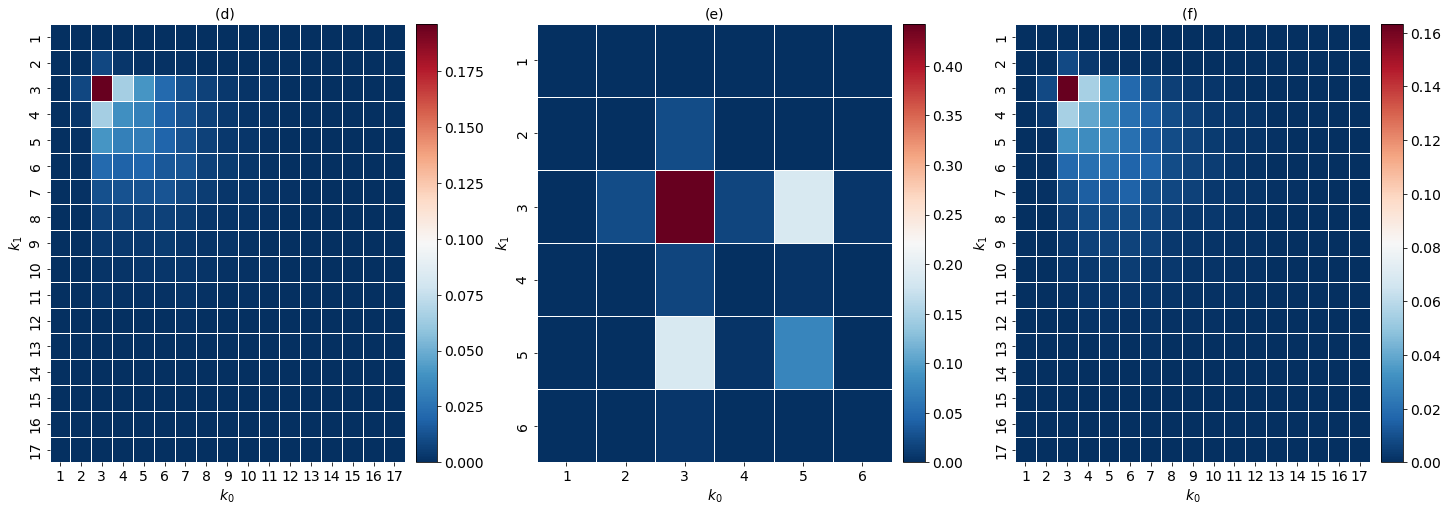

In [143]:

# 绘图
fig,ax = plt.subplots(1,3,figsize=(20,7),constrained_layout=True)
fig.set_facecolor('white')

#  公交
emat_coll,cmat_coll = cal_correlation_matrix(G)
bh=sns.heatmap(emat_coll,ax=ax[0],linewidths=.5,cmap='RdBu_r',cbar=False)

bcb=bh.figure.colorbar(bh.collections[0],ax=ax[0],pad=0.03) #显示colorbar
bcb.ax.tick_params(labelsize=14) #设置colorbar刻度字体大小

ax[0].set_xlabel('$k_0$', fontsize=14)
ax[0].set_ylabel('$k_1$', fontsize=14)
ax[0].set_title(f'(d) ',fontsize=14)

bnpl=np.linspace(1,emat_coll.shape[0],emat_coll.shape[0])
bnpl=[int(c) for c in list(bnpl)]
ax[0].set_xticklabels(labels=bnpl,fontsize=14)
ax[0].set_yticklabels(labels=bnpl,fontsize=14)

ax[0].tick_params(labelsize=14)

# 地铁
mmemat_coll,mmcmat_coll = cal_correlation_matrix(mmG)
mmh=sns.heatmap(mmemat_coll,ax=ax[1],linewidths=.5,cmap='RdBu_r',cbar=False)

mcb=mmh.figure.colorbar(mmh.collections[0],ax=ax[1],pad=0.03) #显示colorbar
mcb.ax.tick_params(labelsize=14) #设置colorbar刻度字体大小


ax[1].set_xlabel('$k_0$', fontsize=14)
ax[1].set_ylabel('$k_1$', fontsize=14)
ax[1].set_title(f'(e)',fontsize=14)

mnpl=np.linspace(1,mmemat_coll.shape[0],mmemat_coll.shape[0])
mnpl=[int(c) for c in list(mnpl)]

ax[1].set_xticklabels(labels=mnpl,fontsize=14)
ax[1].set_yticklabels(labels=mnpl,fontsize=14)

ax[1].tick_params(labelsize=14)

# 公交-地铁
mmbsemat_coll,mmbscmat_coll = cal_correlation_matrix(mmbsG)

mmbh=sns.heatmap(mmbsemat_coll,ax=ax[2],linewidths=.5,cmap='RdBu_r',cbar=False)


cb=mmbh.figure.colorbar(mmbh.collections[0],ax=ax[2],pad=0.03) #显示colorbar
cb.ax.tick_params(labelsize=14) #设置colorbar刻度字体大小


ax[2].set_xlabel('$k_0$', fontsize=14) 
ax[2].set_ylabel('$k_1$', fontsize=14) 
ax[2].set_title(f'(f) ',fontsize=14)


mbnpl=np.linspace(1,mmbsemat_coll.shape[0],mmbsemat_coll.shape[0])
mbnpl=[int(c) for c in list(mbnpl)]

ax[2].set_xticklabels(labels=mbnpl,fontsize=14)
ax[2].set_yticklabels(labels=mbnpl,fontsize=14)
ax[2].tick_params(labelsize=14)

# fig.tight_layout()


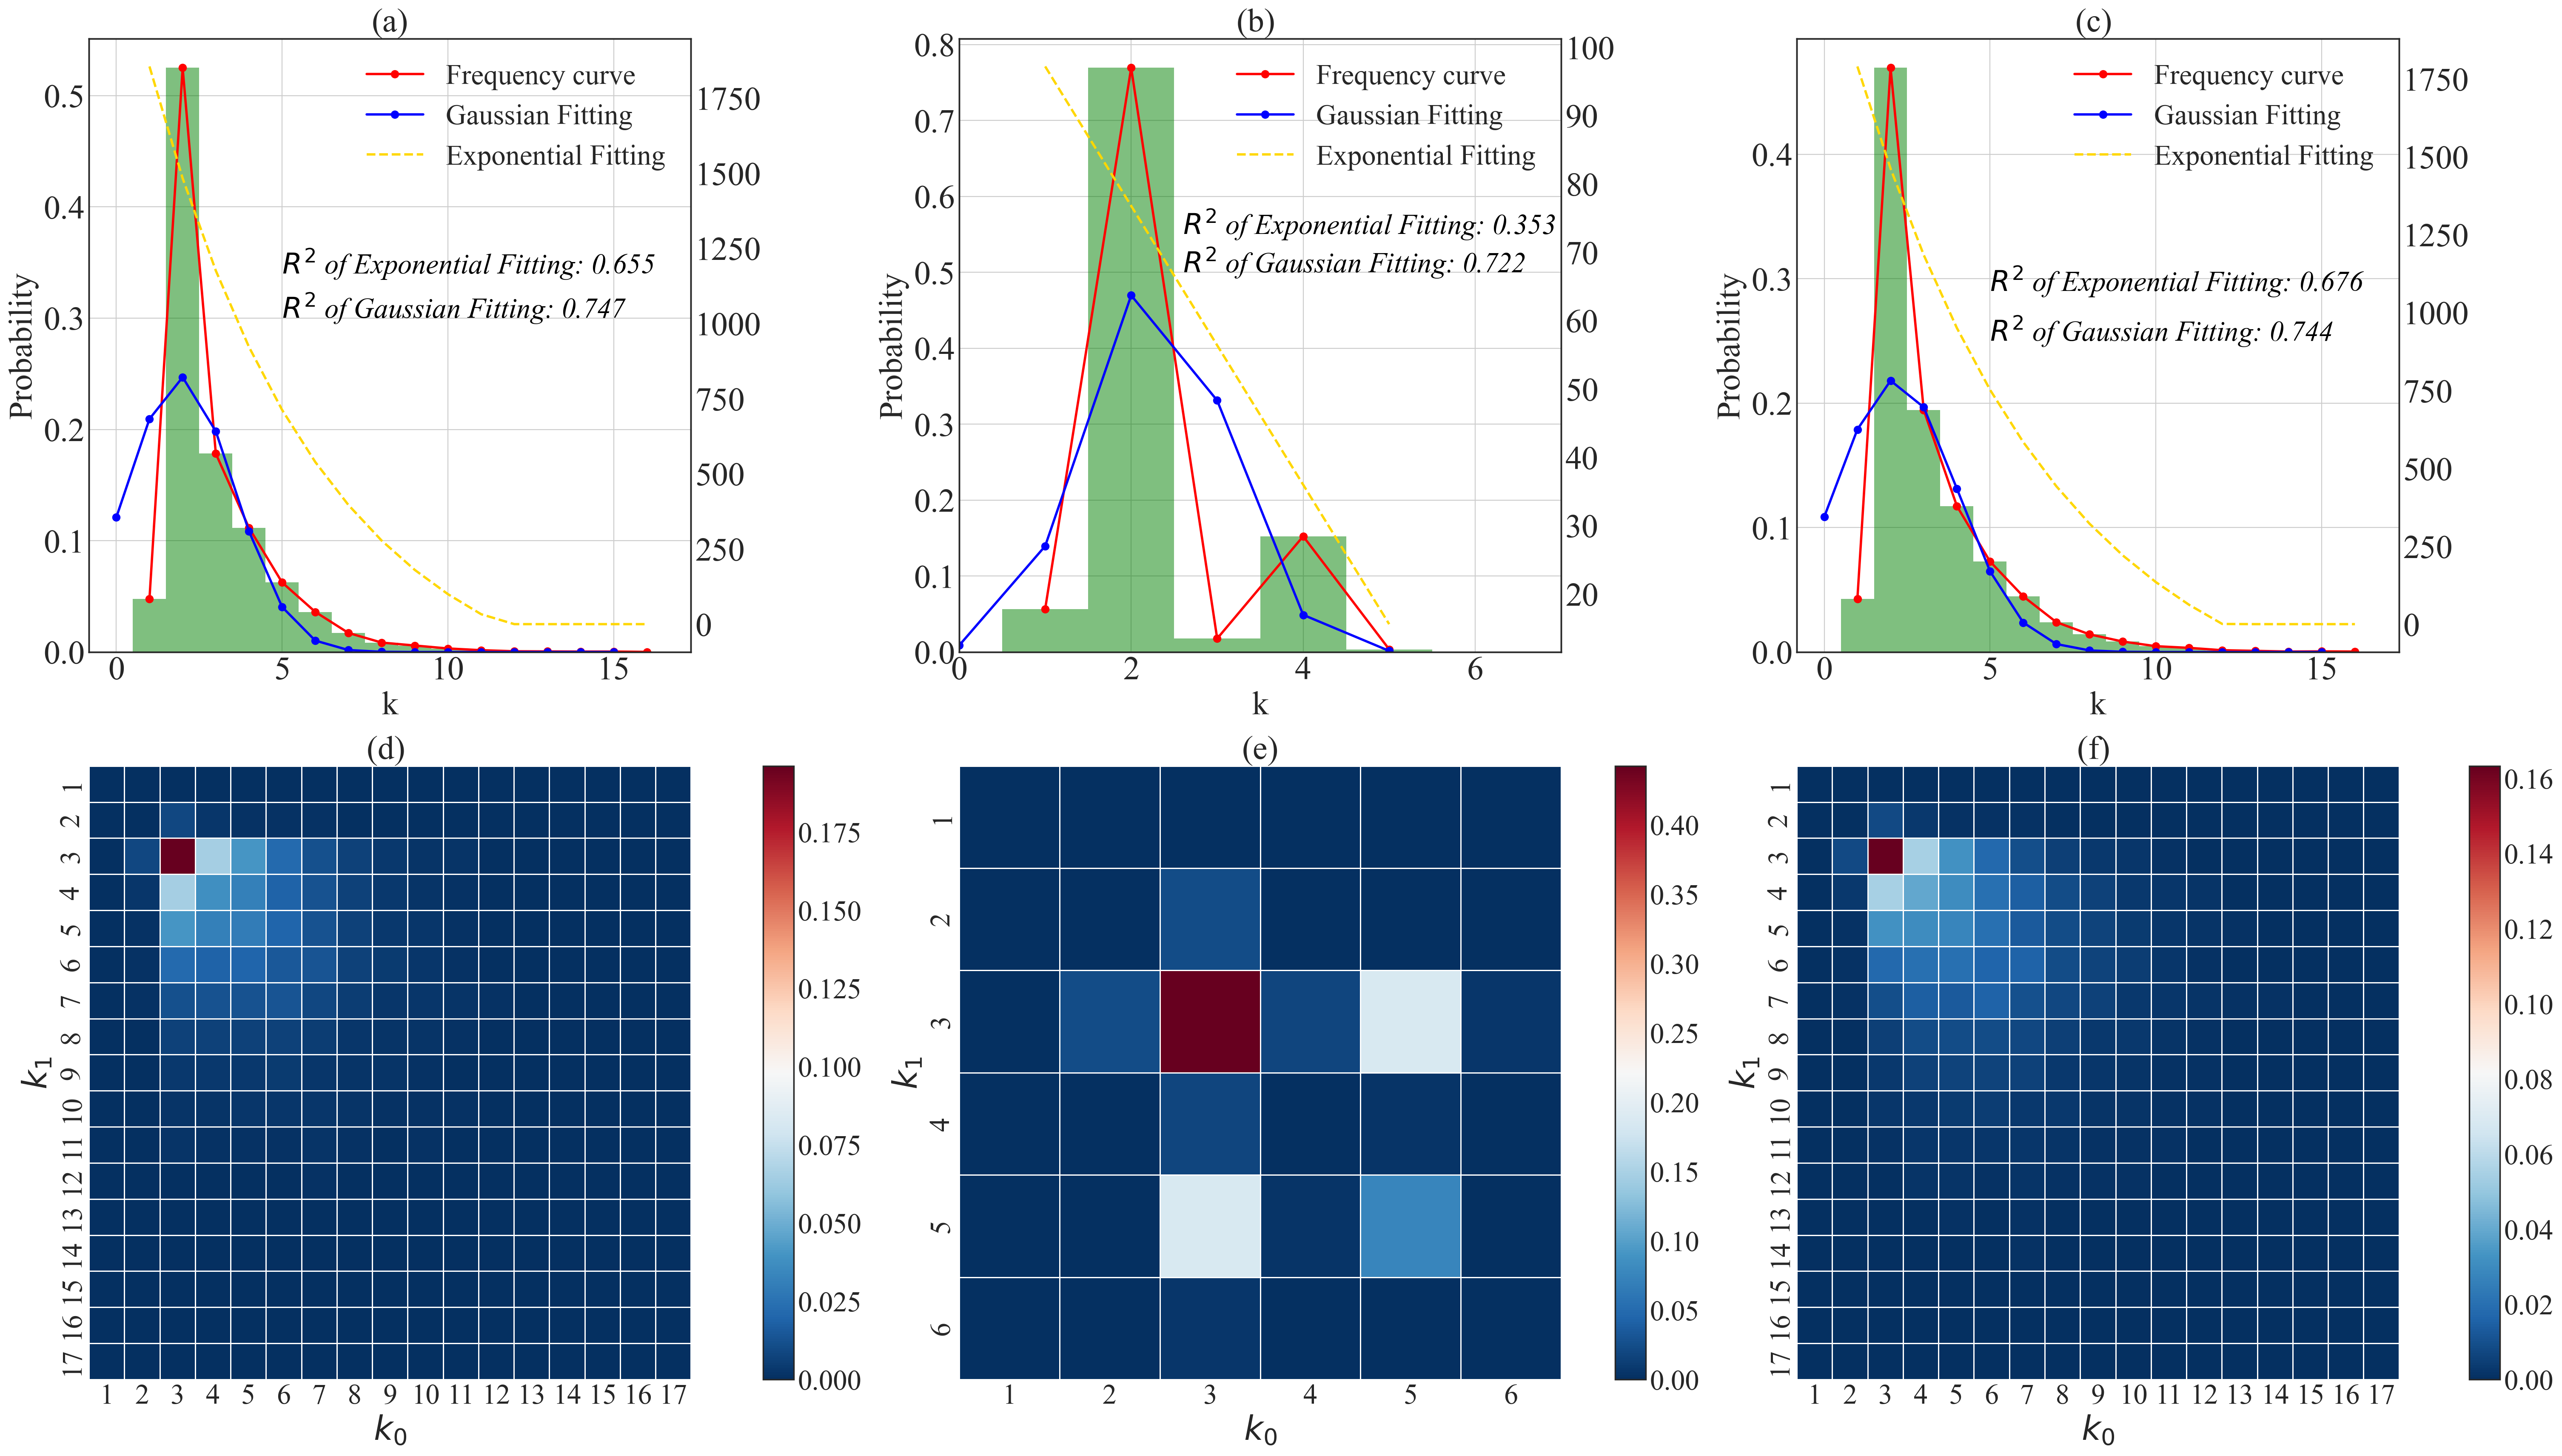

In [54]:
# G,mmG,mmbsG
## 节点的度分布



bsdg = nx.degree(G) #公交
bsdg=pd.DataFrame(bsdg)[1].to_list()
mmdg = nx.degree(mmG) #地铁
mmdg=pd.DataFrame(mmdg)[1].to_list()
mmbsdg = nx.degree(mmbsG) #公交-地铁
mmbsdg=pd.DataFrame(mmbsdg)[1].to_list()
# for c in range(len(mmdg)):
#     if mmdg[c]==3:
#         mmdg[c]=4
# 度分布及拟合
bsbins = np.arange(min(bsdg)-0.5, max(bsdg)+1, 1.0)
mmbins = np.arange(min(mmdg)-0.5, max(mmdg)+1, 1.0)
mmbsbins = np.arange(min(mmbsdg)-0.5, max(mmbsdg)+1, 1.0)

# 绘图
fig,ax = plt.subplots(2,3,figsize=(30,17),constrained_layout=True,dpi=200)
fig.set_facecolor('white')
# plt.rcParams['font.family'] ='Times New Roman'
# plt.rcParams['figure.dpi'] = 3500 #分辨率


# 公交
# # 拟合正态分布
ybs,xbs, bspatche=ax[0][0].hist(bsdg, bins = bsbins,density=True,
                        facecolor='green', alpha=0.5)
bsmu =np.mean(list(bsdg)) #计算均值 
bssigma =np.std(list(bsdg)) 
bsy = norm.pdf(np.fix(xbs[1::]), bsmu, bssigma)
ba1=ax[0][0].plot(np.fix(xbs[1::]), ybs,'ro-',linewidth=2,label='Frequency curve')
ba2=ax[0][0].plot(np.fix(xbs[:-1]),bsy,'bo-',linewidth=2,label='Gaussian Fitting')

# 拟合幂律分布
popt, pcov = curve_fit(func,np.fix(xbs[1::]),ybs*len(bsdg))
y2 = [func(i, popt[0],popt[1],popt[2]) for i in np.fix(xbs[1::])]
for i in range(len(y2)):
    if y2[i]<=0:
        y2[i]=0
ax11=ax[0][0].twinx()
ba3=ax11.plot(np.fix(xbs[1::]),y2,color='gold',linestyle='--',linewidth=2,label='Exponential Fitting')
# ax11.set_ylim(bottom=0.)

ax[0][0].grid(True)
ax[0][0].set_title(f'(a)', fontsize=28)
ax[0][0].set_xlabel('k', fontsize=28)
ax[0][0].set_ylabel('Probability', fontsize=28) 

baxx2=ba1+ba2+ba3
blabs1=[l.get_label() for l in baxx2]
ax[0][0].legend(baxx2,blabs1,loc=0,fontsize=24)

ax11.tick_params(labelsize=28)

# 地铁
ymm,xmm, mmpatche=ax[0][1].hist(mmdg, bins = mmbins,density=True,
                        facecolor='green', alpha=0.5)
mmmu =np.mean(list(mmdg)) #计算均值 
mmsigma =np.std(list(mmdg)) 
mmy = norm.pdf(np.fix(xmm), mmmu, mmsigma)
ma1=ax[0][1].plot(np.fix(xmm[1::]), ymm, 'ro-',linewidth=2,label='Frequency curve')
ma2=ax[0][1].plot(np.fix(xmm), mmy,'bo-',linewidth=2, label='Gaussian Fitting')
# 拟合幂律分布
mmpopt, mmpcov = curve_fit(func,np.fix(xmm[1::]),ymm*len(mmdg),maxfev=500000)
mmy2 = [func(i, mmpopt[0],mmpopt[1],mmpopt[2]) for i in np.fix(xmm[1::])]
for i in range(len(mmy2)):
    if mmy2[i]<=0:
        mmy2[i]=0
ax22=ax[0][1].twinx()
ma3=ax22.plot(np.fix(xmm[1::]),mmy2,color='gold',linestyle='--',linewidth=2,label='Exponential Fitting')

ax[0][1].grid(True)
ax[0][1].set_title(f'(b) ', fontsize=28)
ax[0][1].set_xlabel('k', fontsize=28)
ax[0][1].set_ylabel('Probability', fontsize=28)

maxx2=ma1+ma2+ma3
mlabs1=[l.get_label() for l in maxx2]
ax[0][1].legend(maxx2,mlabs1,loc=0,fontsize=24)

ax22.tick_params(labelsize=28)

# 公交-地铁
ymmbs,xmmbs, mmbspatche=ax[0][2].hist(mmbsdg, bins = mmbsbins,density=True,
                        facecolor='green', alpha=0.5)
mmbsmu =np.mean(list(mmbsdg)) #计算均值 
mmbssigma =np.std(list(mmbsdg)) 
mmbsy = norm.pdf(np.fix(xmmbs[1::]), mmbsmu, mmbssigma)
a1=ax[0][2].plot(np.fix(xmmbs[1::]), ymmbs, 'ro-',linewidth=2,label='Frequency curve')
a2=ax[0][2].plot(np.fix(xmmbs[:-1]), mmbsy, 'bo-',linewidth=2,label='Gaussian Fitting')

mmbspopt, mmbspcov = curve_fit(func,np.fix(xmmbs[1::]),ymmbs*len(mmbsdg))
mmbsy2 = [func(i, mmbspopt[0],mmbspopt[1],mmbspopt[2]) for i in np.fix(xmmbs[1::])]
for i in range(len(mmbsy2)):
    if mmbsy2[i]<=0:
        mmbsy2[i]=0
ax33=ax[0][2].twinx()
a3=ax33.plot(np.fix(xmmbs[1::]),mmbsy2,color='gold',linestyle='--',linewidth=2,label='Exponential Fitting')
ax[0][2].grid(True)
ax[0][2].set_title(f'(c) ', fontsize=28)
ax[0][2].set_xlabel('k', fontsize=28) 
ax[0][2].set_ylabel('Probability', fontsize=28)
axx2=a1+a2+a3
labs1=[l.get_label() for l in axx2]
ax[0][2].legend(axx2,labs1,loc=0,fontsize=24)

ax33.tick_params(labelsize=28)

# R2
bslope, bintercept, br_value, bp_value, bstd_err = stats.linregress(ybs*len(bsdg), y2) 
ax[0][0].text(5, 0.34, '$R^2$ of Exponential Fitting: %s'%(round(br_value,3)), style ='italic', 
        fontsize = 24, color ="black")
bslope1, bintercept1, br_value1, bp_value1, bstd_err1 = stats.linregress(ybs, bsy) 
ax[0][0].text(5, 0.3, '$R^2$ of Gaussian Fitting: %s'%(round(br_value1,3)), style ='italic', 
        fontsize = 24, color ="black")

ax[0][0].tick_params(labelsize=28)

mslope, mintercept, mr_value, mp_value, mstd_err = stats.linregress(ymm*len(mmdg), mmy2) 
ax[0][1].text(2.6, 0.55, '$R^2$ of Exponential Fitting: %s'%(round(mr_value,3)), style ='italic', 
        fontsize = 24, color ="black")
bslope2, bintercept2, br_value2, bp_value2, bstd_err2 = stats.linregress(mmy[1::], ymm) 
ax[0][1].text(2.6, 0.5, '$R^2$ of Gaussian Fitting: %s'%(round(br_value2,3)), style ='italic', 
        fontsize = 24, color ="black")

ax[0][1].tick_params(labelsize=28)

slope, intercept, r_value, p_value, std_err = stats.linregress(ymmbs*len(mmbsdg), mmbsy2) 
ax[0][2].text(5, 0.29, '$R^2$ of Exponential Fitting: %s'%(round(r_value,3)), style ='italic', 
        fontsize = 24, color ="black")
bslope3, bintercept3, br_value3, bp_value3, bstd_err3 = stats.linregress(mmbsy, ymmbs) 
ax[0][2].text(5, 0.25, '$R^2$ of Gaussian Fitting: %s'%(round(br_value3,3)), style ='italic', 
        fontsize = 24, color ="black")

ax[0][2].tick_params(labelsize=28)


#  公交
emat_coll,cmat_coll = cal_correlation_matrix(G)
bh=sns.heatmap(emat_coll,ax=ax[1][0],linewidths=.5,cmap='RdBu_r',cbar=False)

bcb=bh.figure.colorbar(bh.collections[0],ax=ax[1][0],pad=0.003) #显示colorbar
bcb.ax.tick_params(labelsize=24) #设置colorbar刻度字体大小

ax[1][0].set_xlabel('$k_0$', fontsize=28)
ax[1][0].set_ylabel('$k_1$', fontsize=28)
ax[1][0].set_title(f'(d) ',fontsize=28)

bnpl=np.linspace(1,emat_coll.shape[0],emat_coll.shape[0])
bnpl=[int(c) for c in list(bnpl)]
ax[1][0].set_xticklabels(labels=bnpl,fontsize=26)
ax[1][0].set_yticklabels(labels=bnpl,fontsize=26)

ax[1][0].tick_params(labelsize=24)

# 地铁
mmemat_coll,mmcmat_coll = cal_correlation_matrix(mmG)
mmh=sns.heatmap(mmemat_coll,ax=ax[1][1],linewidths=.5,cmap='RdBu_r',cbar=False)

mcb=mmh.figure.colorbar(mmh.collections[0],ax=ax[1][1],pad=0) #显示colorbar
mcb.ax.tick_params(labelsize=24) #设置colorbar刻度字体大小


ax[1][1].set_xlabel('$k_0$', fontsize=28)
ax[1][1].set_ylabel('$k_1$', fontsize=28)
ax[1][1].set_title(f'(e)',fontsize=28)

mnpl=np.linspace(1,mmemat_coll.shape[0],mmemat_coll.shape[0])
mnpl=[int(c) for c in list(mnpl)]

ax[1][1].set_xticklabels(labels=mnpl,fontsize=26)
ax[1][1].set_yticklabels(labels=mnpl,fontsize=26)

ax[1][1].tick_params(labelsize=24)

# 公交-地铁
mmbsemat_coll,mmbscmat_coll = cal_correlation_matrix(mmbsG)

mmbh=sns.heatmap(mmbsemat_coll,ax=ax[1][2],linewidths=.5,cmap='RdBu_r',cbar=False)


cb=mmbh.figure.colorbar(mmbh.collections[0],ax=ax[1][2],pad=0) #显示colorbar
cb.ax.tick_params(labelsize=24) #设置colorbar刻度字体大小


ax[1][2].set_xlabel('$k_0$', fontsize=28) 
ax[1][2].set_ylabel('$k_1$', fontsize=28) 
ax[1][2].set_title(f'(f) ',fontsize=28)


mbnpl=np.linspace(1,mmbsemat_coll.shape[0],mmbsemat_coll.shape[0])
mbnpl=[int(c) for c in list(mbnpl)]

ax[1][2].set_xticklabels(labels=mbnpl,fontsize=26)
ax[1][2].set_yticklabels(labels=mbnpl,fontsize=26)
ax[1][2].tick_params(labelsize=24)
ax[0][1].set_xlim(0,7)

# fig.tight_layout()

plt.show()

In [ ]:
# G,mmG,mmbsG
## 节点的度分布

bsdg = nx.degree(G) #公交
bsdg=pd.DataFrame(bsdg)[1].to_list()
mmdg = nx.degree(mmG) #地铁
mmdg=pd.DataFrame(mmdg)[1].to_list()
mmbsdg = nx.degree(mmbsG) #公交-地铁
mmbsdg=pd.DataFrame(mmbsdg)[1].to_list()
# for c in range(len(mmdg)):
#     if mmdg[c]==3:
#         mmdg[c]=4
# 度分布及拟合
bsbins = np.arange(min(bsdg)-0.5, max(bsdg)+1, 1.0)
mmbins = np.arange(min(mmdg)-0.5, max(mmdg)+1, 1.0)
mmbsbins = np.arange(min(mmbsdg)-0.5, max(mmbsdg)+1, 1.0)

# 绘图
fig,ax = plt.subplots(3,2,figsize=(30,17),constrained_layout=True,dpi=300)
fig.set_facecolor('white')


In [160]:
nx.degree_pearson_correlation_coefficient(G),nx.degree_pearson_correlation_coefficient(mmG),nx.degree_pearson_correlation_coefficient(mmbsG)

(0.366262180311861, 0.02191408794338766, 0.38647703797138744)

In [159]:
nx.degree_assortativity_coefficient(G),nx.degree_assortativity_coefficient(mmG),nx.degree_assortativity_coefficient(mmbsG)

(0.36626218031184354, 0.02191408794338868, 0.3864770379713806)

In [203]:
20759/3000000

0.006919666666666667

In [204]:
31529/3000000

0.010509666666666667

##  statistics

In [32]:
def calt_tjzb(G1):
    # 节点数
    node_num= G1.number_of_nodes()
    # 边数
    edge_num= G1.number_of_edges()
    # 平均度
    degs1 = nx.degree(G1)
    bsdg1 = nx.degree(G1) #公交
    bsdg1=pd.DataFrame(bsdg1)[1].to_list()
    avdg=np.average(bsdg1)
    avdg=np.round(avdg,0)
    # 聚集系数
    cc = nx.clustering(G1)
    vcc=cc.values()
    avcc=np.average(list(vcc))
    # 介数
    bt=nx.betweenness_centrality(G1)
    bt=[bt[c] for c in range(len(bt))]
    vbt=np.average(bt)*sum(bt)
    return node_num,edge_num,avdg,avcc,vbt

In [ ]:
# 公交
bsnode_num,bsedge_num,bsavdg,bavcc,bvbt=calt_tjzb(G)
# 地铁
mmnode_num,mmedge_num,mmavdg,mmavcc,mmvbt=calt_tjzb(mmG)
# 公交-地铁
mmbsnode_num,mmbsedge_num,mmbsavdg,mmbsavcc,mmbsvbt=calt_tjzb(mmbsG)

In [ ]:
# 公交：节点数量，边数量，平均度，平均聚集系数，平均介数
bsnode_num,bsedge_num,bsavdg,bavcc,bvbt

In [ ]:
# 地铁：节点数量，边数量，平均度，平均聚集系数，平均介数
mmnode_num,mmedge_num,mmavdg,mmavcc,mmvbt

In [344]:
# 公交--地铁：节点数量，边数量，平均度，平均聚集系数，平均介数
mmbsnode_num,mmbsedge_num,mmbsavdg,mmbsavcc,mmbsvbt

(7466, 11788, 3.0, 0.1391874243267225, 0.08599372828756038)

In [425]:
# 公交的平均最短路径
largest_components=max(nx.connected_components(G),key=len)
df=pd.DataFrame(list(G.edges()))
dd=[]
comG=nx.Graph()
for i in largest_components:
    if df[df[0]==i].shape[0]!=0:
        vv=df[df[0]==i].values
        ed1=[(vv[c][0],vv[c][1]) for c in range(vv.shape[0])]
        dd.extend(ed1)
    if df[df[1]==i].shape[0]!=0:
        vv1=df[df[1]==i].values
        ed2=[(vv1[c][0],vv1[c][1]) for c in range(vv1.shape[0])]
        dd.extend(ed2)
    vv=[]
    vv1=[]
comG.add_edges_from(dd)
print(['公交平均最短路径',nx.average_shortest_path_length(comG)])

# 地铁的平均最短路径
mm_len=nx.average_shortest_path_length(mmG)
print(['地铁平均最短路径：',mm_len])

# 公交——地铁的平均最短路径
largest_components1=max(nx.connected_components(mmbsG),key=len)
df1=pd.DataFrame(list(mmbsG.edges()))
dd=[]
commmbsG=nx.Graph()
for i in largest_components1:
    if df1[df1[0]==i].shape[0]!=0:
        vv=df1[df1[0]==i].values
        ed1=[(vv[c][0],vv[c][1]) for c in range(vv.shape[0])]
        dd.extend(ed1)
    if df1[df1[1]==i].shape[0]!=0:
        vv1=df1[df1[1]==i].values
        ed2=[(vv1[c][0],vv1[c][1]) for c in range(vv1.shape[0])]
        dd.extend(ed2)
    vv=[]
    vv1=[]
commmbsG.add_edges_from(dd)
print(['公交-地铁平均最短路径',nx.average_shortest_path_length(commmbsG)])

['公交-地铁平均最短路径', 26.52247891882202]


In [428]:
# 网络效率
# 公交
print(['公交网络效率：',nx.global_efficiency(G)])
# 地铁
print(['地铁网络效率：',nx.global_efficiency(mmG)])
# 公交---地铁
print(['公交-地铁网络效率：',nx.global_efficiency(mmbsG)])

['公交网络效率：', 0.050753856841198194]
['地铁网络效率：', 0.10365801541628737]
['公交-地铁网络效率：', 0.05374577852283107]


## 1.3 community detection

###   combo

In [2]:
import numpy as np
from communities.algorithms import louvain_method
import os
import pycombo
os.environ["KMP_DUPLICATE_LIB_OK"]  =  "TRUE"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import igraph as ig
from igraph import *
import datetime
from matplotlib import cm

ModuleNotFoundError: No module named 'communities'

In [3]:
# 地铁社区划分
pmmG=nx.Graph()
medges=mmG.edges()
medges=list(medges)
mnas = nx.get_node_attributes(mmG, 'name')
medges=[(str(mnas[c[0]]),str(mnas[c[1]])) for c in medges]
pmmG.add_edges_from(medges)
nx.write_gexf(pmmG,'net\\metro_net.gexf')

# 公交社区划分
pbsG=nx.Graph()
bedges=G.edges()
bedges=list(bedges)
bnas = nx.get_node_attributes(G, 'name')
bedges=[(str(bnas[c[0]]),str(bnas[c[1]])) for c in bedges]
pbsG.add_edges_from(bedges)
nx.write_gexf(pbsG,'net\\bus_net.gexf')
# 公交——地铁社区划分
pmmbsG=nx.Graph()
bmedges=mmbsG.edges()
bmedges=list(bmedges)
bmnas = nx.get_node_attributes(mmbsG, 'name')
bmedges=[(str(bmnas[c[0]]),str(bmnas[c[1]])) for c in bmedges]
pmmbsG.add_edges_from(bmedges)
nx.write_gexf(pmmbsG,'net\\metro_bus_net.gexf')


NameError: name 'nx' is not defined

In [31]:
# 读取检测结果
# 公交
bcom=pd.read_csv(r'net\bsgc_01.csv',encoding='utf-8')
print(bcom.shape)
bcom=bcom.drop(columns=['Label','timeset'])
bcom=bcom.rename(columns={'Id':'station'})

# 地铁
mcom=pd.read_csv('net\mmgc_01.csv',encoding='utf-8')
print(mcom.shape)
mcom=mcom.drop(columns=['Label','timeset'])
mcom=mcom.rename(columns={'Id':'station'})
# 地铁-公交
mbcom=pd.read_csv('net\mmbsgc_01.csv',encoding='utf-8')
print(mbcom.shape)
mbcom=mbcom.drop(columns=['Label','timeset'])
mbcom=mbcom.rename(columns={'Id':'station'})

(7184, 4)
(282, 4)
(7466, 4)


In [32]:
# 公交
print(gebs.shape)
gebsn=gebs.merge(bcom,how='inner',on='station')
print(gebsn.shape[0]==gebs.shape[0])
# 地铁
print(gemm.shape)
gemmn=gemm.merge(mcom,how='inner',on='station')
print(gemm.shape[0]==gemmn.shape[0])
# 公交——地铁
print(gemmbs.shape)
gemmbsn=gemmbs.merge(mbcom,how='inner',on='station')
print(gemmbsn.shape[0]==gemmbs.shape[0])

(7184, 4)
True
(282, 4)
True
(7466, 4)
True


In [33]:
#  地铁线路
# shapefile\subway_line.shp
sbline = gpd.read_file('shapefile\subway_line.shp')
# 北京面域
beij=gpd.read_file('shapefile\\beij_fq.shp')
# 公交线路
busline=gpd.read_file('shapefile\\bus_line.shp')

In [1]:
# 绘制社区划分结果
fig,ax = plt.subplots(2,3,figsize=(27,18),dpi=400)
plt.rcParams['font.family'] ='Times New Roman'
#1 公交
bcommunities=gebsn.copy()
bslblen=max(list(gebsn['modularity_class']))+1
leg=['Module %s'%(i) for i in range(bslblen)]
bcommunities.plot(ax=ax[0][0],column='modularity_class',cmap='tab10',
                    scheme="equalinterval",k=bslblen,legend=True,
                  legend_kwds={'labels':leg,'fontsize':18,'markerscale':0.8,'shadow':False,
                               'ncol':1,'columnspacing':1,'handletextpad':0.02,'loc':4,'labelspacing':0.02,
                               'columnspacing':0.15,'handletextpad':0.1},markersize=4)
bs2=gebs.copy()
bs3=gpd.sjoin(beij,bs2,predicate='intersects')
bs3.plot(ax=ax[0][0],facecolor='none',edgecolor='k')
ax[0][0].tick_params(labelsize=22)
ax[0][0].set_title(f'(a)',fontsize=24)

ax[0][0].set_xlim(115.2,117.9)

# ax[0][0].axis('off')
#2 地铁
mcommunities=gemmn.copy()
# sbline.plot(ax=ax[0][0],color='grey',linewidth=1.5,alpha=0.5)
mmlblen=max(list(gemmn['modularity_class']))+1
leg=['Module %s'%(i) for i in range(mmlblen)]
mcommunities.plot(ax=ax[0][1],column='modularity_class',cmap='tab10',
                    scheme="equalinterval",k=mmlblen,legend=True,
                  legend_kwds={'labels':leg,'fontsize':18,'markerscale':0.8,'shadow':False,
                               'ncol':1,'columnspacing':1,'handletextpad':0.02,'loc':4,'labelspacing':0.02,
                               'columnspacing':0.15,'handletextpad':0.1},markersize=4)
mm2=gemm.copy()
bs3.plot(ax=ax[0][1],facecolor='none',edgecolor='k')
ax[0][1].tick_params(labelsize=22)
ax[0][1].set_title(f'(b)',fontsize=24)
ax[0][1].set_xlim(115.2,117.9)
# mm3=gpd.sjoin(beij,mm2,predicate='intersects')
# mm3.plot(ax=ax[0][1],facecolor='none',edgecolor='k')

# ax[0][1].axis('off')
#3 公交--地铁
mbcommunities=gemmbsn.copy()
# sbline.plot(ax=ax[0][0],color='grey',linewidth=1.5,alpha=0.5)
mmbslblen=max(list(gemmbsn['modularity_class']))+1
leg=['Module %s'%(i) for i in range(mmbslblen)]
mbcommunities.plot(ax=ax[0][2],column='modularity_class',cmap='tab10',
                    scheme="equalinterval",k=mmbslblen,legend=True,
                   legend_kwds={'labels':leg,'fontsize':18,'markerscale':0.8,'shadow':False,
                                'ncol':1,'columnspacing':1,'handletextpad':0.02,'loc':4,'labelspacing':0.02,
                                'columnspacing':0.15,'handletextpad':0.1},markersize=4)
mmbs2=gemmbs.copy()
mmbs3=gpd.sjoin(beij,mmbs2,predicate='intersects')
mmbs3.plot(ax=ax[0][2],facecolor='none',edgecolor='k')

ax[0][2].tick_params(labelsize=22)
ax[0][2].set_title(f'(c)',fontsize=24)

ax[0][2].set_xlim(115.2,117.9)

# ax[0][2].axis('off')
# 模块度的统计结果
# 模块的节点数量以及模块值
# 公交模块度
bslblen=max(list(gebsn['modularity_class']))+1
leg=['Module %s'%(i) for i in range(bslblen)]
y=list(bcommunities.groupby(by='modularity_class').count()['station'])
x=leg
map_vir = cm.get_cmap(name='tab10')
color =map_vir(list(np.linspace(0,1,len(x))))

axal0=[]
for i in range(len(x)):
    axal0.append(ax[1][0].bar([x[i]],[y[i]],color=color[i],label=x[i],alpha=0.75))
           
x_t = list(range(len(x)))
ax[1][0].set_xticklabels(labels=x,fontsize=20,rotation=45,alpha=0.7)

# ax10=ax[1][0].twinx()
# axb=ax10.plot(x_t,np.cumsum(y),color='gold',linestyle='--',linewidth=2.0,marker='o',label='Number of nodes')

# axbal=axal0+axb
axbal=axal0
blabs1=[l.get_label() for l in axbal]
ax[1][0].legend(axbal,blabs1,loc=2,frameon=False,ncol=3,fontsize=19,columnspacing=0.8,handletextpad=0.02)

ax[1][0].set_title(f'(d) ',fontsize=24)
ax[1][0].set_xlabel('modularity class', fontsize=24) 
ax[1][0].set_ylabel('Numbers of nodes', fontsize=24)

ax[1][0].text(7, 1250, 'Modularity index: 0.840', style ='italic', 
        fontsize = 22, color ="black")
ax[1][0].tick_params(labelsize=21)
# ax10.tick_params(labelsize=14)

ax[1][0].grid(True)

# 地铁模块度
mmlblen=max(list(gemmn['modularity_class']))+1
mleg=['Module %s'%(i) for i in range(mmlblen)]
my=list(mcommunities.groupby(by='modularity_class').count()['station'])
mx=mleg
mmap_vir = cm.get_cmap(name='tab10')
mcolor =mmap_vir(list(np.linspace(0,1,len(mx))))

axal1=[]
for i in range(len(mx)):
    axal1.append(ax[1][1].bar([mx[i]],[my[i]],color=mcolor[i],label=mx[i],alpha=0.75,width=0.35))

mx_t = list(range(len(mx)))
ax[1][1].set_xticklabels(labels=mx,fontsize=20,rotation=45,alpha=0.7)
# ax11=ax[1][1].twinx()
# axm=ax11.plot(mx_t,np.cumsum(my),color='gold',linestyle='--',linewidth=2.0,marker='o',label='Number of nodes')
# axmal=axal1+axm
axmal=axal1
mlabs1=[l.get_label() for l in axmal]
ax[1][1].legend(axmal,mlabs1,loc=2,frameon=False,ncol=1,fontsize=20)


ax[1][1].set_title(f'(e) ',fontsize=24)
ax[1][1].set_xlabel('modularity class', fontsize=24) 
ax[1][1].set_ylabel('Numbers of nodes', fontsize=24)


ax[1][1].text(1.5, 65, 'Modularity index: 0.675', style ='italic', 
        fontsize = 22, color ="black")
ax[1][1].tick_params(labelsize=21)
# ax11.tick_params(labelsize=14)

ax[1][1].grid(True)


# 公交--地铁模块度
mmbslblen=max(list(gemmbsn['modularity_class']))+1
mbleg=['Module %s'%(i) for i in range(mmbslblen)]
mby=list(mbcommunities.groupby(by='modularity_class').count()['station'])
mbx=mbleg
mbmap_vir = cm.get_cmap(name='tab10')
mbcolor =mbmap_vir(list(np.linspace(0,1,len(mbx))))

axal2=[]
for i in range(len(mbx)):
    axal2.append(ax[1][2].bar([mbx[i]],[mby[i]],color=mbcolor[i],alpha=0.75,label=mbx[i]))
                 
mbx_t = list(range(len(mbx)))
ax[1][2].set_xticklabels(labels=mbx,fontsize=20,rotation=45)

# ax12=ax[1][2].twinx()
# axmb=ax12.plot(mbx_t,np.cumsum(mby),color='gold',linestyle='--',linewidth=2.0,marker='o',label='Number of nodes')

# axmbal=axal2+axmb
axmbal=axal2
mblabs1=[l.get_label() for l in axmbal]
ax[1][2].legend(axmbal,mblabs1,loc=2,frameon=False,ncol=4,fontsize=18,columnspacing=0.8,handletextpad=0.02)

ax[1][2].set_title(f'(f) ',fontsize=24)
ax[1][2].set_xlabel('modularity class', fontsize=24) 
ax[1][2].set_ylabel('Numbers of nodes', fontsize=24)

ax[1][2].text(7, 1480, 'Modularity index: 0.825', style ='italic', 
        fontsize = 22, color ="black")
ax[1][2].tick_params(labelsize=20)
# ax12.tick_params(labelsize=20)
ax[1][2].set_ylim(0,2000)
ax[1][2].set_xlim(-1,13)
ax[1][2].grid(True)

ax[1][0].set_ylim(0,1900)

fig.tight_layout()

plt.show()

NameError: name 'plt' is not defined

##  2 strucutre importance

In [688]:

score = nx.betweenness_centrality(mmbsG)

In [690]:
nans=nx.get_node_attributes(mmbsG, 'name')


In [694]:
nas=[]
sall=[]
for i in range(len(nans)):
    nas.append(nans[i])
    sall.append(score[i])
s_im=pd.DataFrame()
s_im['station']=nas
s_im['strucutre_importance']=sall
s_im.head()

station  strucutre_importance
0     黄村火车站_b              0.000024
1       清华园_b              0.000544
2     北车营七队_b              0.000267
3  小沙河村公交场站_b              0.000000
4    北辰福第小区_b              0.000059

In [696]:
s_im.to_csv('公交-地铁结构重要度.csv',index=None,encoding='gbk')